In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('zomato.csv',encoding='latin-1')

- **Restaurant ID**: A unique identifier assigned to each restaurant in the dataset.

- **Restaurant Name**: The name of the restaurant.

- **Country Code**: A numeric code representing the country where the restaurant is located. For example, '1' could represent India, '189' could represent South Africa, etc.

- **City**: The city where the restaurant is located.

- **Address**: The complete address of the restaurant.

- **Locality**: A specific area or neighborhood within the city where the restaurant is situated.

- **Locality Verbose**: A more detailed description of the locality, often including landmarks or additional context.

- **Longitude**: The geographical longitude coordinate of the restaurant's location.

- **Latitude**: The geographical latitude coordinate of the restaurant's location.

- **Cuisines**: The types of cuisines offered by the restaurant, such as North Indian, Mughlai, Italian, etc.

- **Average Cost for two**: The average cost of a meal for two people at the restaurant.

- **Currency**: The currency in which prices are listed, such as Indian Rupees (Rs.) or South African Rand (R).

- **Has Table booking**: Indicates whether the restaurant offers table booking services. This can be 'Yes' or 'No'.

- **Has Online delivery**: Indicates whether the restaurant provides online delivery services. This can be 'Yes' or 'No'.

- **Is delivering now**: Indicates whether the restaurant is currently delivering food. This can be 'Yes' or 'No'.

- **Switch to order menu**: A flag indicating if there is an option to switch to an order menu. This is typically 'No' if the feature is not available.

- **Price range**: A numeric value representing the price range category of the restaurant, often on a scale of 1 to 5, with 1 being the least expensive and 5 being the most expensive.

- **Aggregate rating**: The average rating of the restaurant based on customer reviews, usually on a scale of 0 to 5.

- **Rating color**: The color code associated with the aggregate rating, which can be used for visual representation. For example, 'Orange' for average ratings.

- **Rating text**: A textual representation of the rating, such as 'Average', 'Good', 'Excellent', etc.

- **Votes**: The total number of votes or reviews the restaurant has received from customers.


# **Feature Engineering**

## **1. Feature Transformation**

In [110]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [111]:
data = pd.merge(data,df_country,on='Country Code', how='left')

In [112]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [113]:
# Extract information from Locality
data[['Mall', 'Area', 'City from Locality']] = data['Locality'].str.split(', ', expand=True, n=2)

In [114]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Mall,Area,City from Locality
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,Phillipines,Century City Mall,Poblacion,Makati City
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,Phillipines,Little Tokyo,Legaspi Village,Makati City


In [115]:
data.drop(columns=['Restaurant ID', 'Address', 'Locality Verbose','Switch to order menu', 'Locality', 'City from Locality', 'Country Code', 'Rating color'], inplace=True)

In [116]:
data.head(2)

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Mall,Area
0,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines,Century City Mall,Poblacion
1,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines,Little Tokyo,Legaspi Village


# DataType Conversion

In [117]:
data.dtypes

Restaurant Name          object
City                     object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating text              object
Votes                     int64
Country                  object
Mall                     object
Area                     object
dtype: object

In [118]:
# Convert object columns to categorical if they represent categorical data
categorical_columns = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 
                       'Has Table booking', 'Has Online delivery', 'Is delivering now', 
                         'Rating text', 'Area', 'Country', 'Price range']

data[categorical_columns] = data[categorical_columns].astype('category')

# Display the data types of the columns
data.dtypes

Restaurant Name         category
City                    category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking       category
Has Online delivery     category
Is delivering now       category
Price range             category
Aggregate rating         float64
Rating text             category
Votes                      int64
Country                 category
Mall                      object
Area                    category
dtype: object

In [119]:
num_numerical = data.select_dtypes(include=['number']).shape[1]
num_categorical = data.select_dtypes(include=['category', 'object']).shape[1]

num_numerical, num_categorical

(5, 12)

In [120]:
data.sample(2)

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Mall,Area
5463,Eating Corner,New Delhi,77.190886,28.705796,"North Indian, Fast Food, Street Food",300,Indian Rupees(Rs.),No,No,No,1,3.7,Good,142,India,Model Town 2,NaN
3099,Excuse Me Boss,New Delhi,77.220846,28.630954,"Continental, North Indian, Chinese, Mediterranean",1800,Indian Rupees(Rs.),Yes,No,No,3,4.1,Very Good,799,India,Connaught Place,NaN


# **Data Cleaning**

## **Handling Null Values**

In [121]:
data.shape

(9551, 17)

In [122]:
data.isnull().sum()

Restaurant Name            0
City                       0
Longitude                  0
Latitude                   0
Cuisines                   9
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Price range                0
Aggregate rating           0
Rating text                0
Votes                      0
Country                    0
Mall                       0
Area                    8124
dtype: int64

In [123]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# # Alternative bright colors
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# # Create a custom colormap
# cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', bright_colors, N=256)

# def plot_missing_values_heatmap(data):
#     """
#     Plots a heatmap of missing values in the provided DataFrame.
    
#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     """
#     plt.figure(figsize=(10, 8))
#     ax = sns.heatmap(data.isnull(), cbar=False, cmap=cmap, yticklabels=False)
    
#     # Update title and labels with specified styles
#     plt.title('Heatmap of Missing Values', fontsize=16, fontweight='bold', family='Times New Roman')
#     plt.xlabel('Columns', fontsize=16, fontweight='bold', family='Times New Roman')
#     plt.ylabel('Rows', fontsize=16, fontweight='bold', family='Times New Roman')
    
#     # Customize tick labels
#     plt.xticks(fontsize=16, fontweight='bold', family='Times New Roman')
#     plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
    
#     plt.show()

# # Example usage
# plot_missing_values_heatmap(data)

In [124]:
data.drop(columns=['Area'], inplace=True)

In [125]:
data.dropna(inplace=True)

In [126]:
data.isnull().sum()

Restaurant Name         0
City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
Mall                    0
dtype: int64

In [127]:
data.shape

(9542, 16)

# **Exploratory Data Analysis (EDA)**

# **Primary Analysis of Data**

In [128]:
# Display the first few rows of the dataset
data.head(2)

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Mall
0,Le Petit Souffle,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Excellent,314,Phillipines,Century City Mall
1,Izakaya Kikufuji,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Excellent,591,Phillipines,Little Tokyo


In [129]:
# Check the size of the dataset
data_shape = data.shape
print(f'The dataset contains {data_shape[0]} rows and {data_shape[1]} columns.')

The dataset contains 9542 rows and 16 columns.


In [130]:
# Attribute Information
attribute_info = data.info()
print("\nAttribute Information:")
print(attribute_info)

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant Name       9542 non-null   category
 1   City                  9542 non-null   category
 2   Longitude             9542 non-null   float64 
 3   Latitude              9542 non-null   float64 
 4   Cuisines              9542 non-null   category
 5   Average Cost for two  9542 non-null   int64   
 6   Currency              9542 non-null   category
 7   Has Table booking     9542 non-null   category
 8   Has Online delivery   9542 non-null   category
 9   Is delivering now     9542 non-null   category
 10  Price range           9542 non-null   category
 11  Aggregate rating      9542 non-null   float64 
 12  Rating text           9542 non-null   category
 13  Votes                 9542 non-null   int64   
 14  Country               9542 non-null   category
 15  Mall     

In [131]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [132]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f'There are {duplicate_rows} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [133]:
# Check the data types of each column
print(data.dtypes)

Restaurant Name         category
City                    category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking       category
Has Online delivery     category
Is delivering now       category
Price range             category
Aggregate rating         float64
Rating text             category
Votes                      int64
Country                 category
Mall                      object
dtype: object


In [134]:
# Get the data types of each column
data_types = data.dtypes

# Count the number of numerical and categorical columns
num_numerical = data_types[data_types.apply(lambda x: pd.api.types.is_numeric_dtype(x))].count()
num_categorical = data_types[data_types.apply(lambda x: pd.api.types.is_categorical_dtype(x) or pd.api.types.is_object_dtype(x))].count()

print(f"Number of numerical columns: {num_numerical}")
print(f"Number of categorical columns: {num_categorical}")

Number of numerical columns: 5
Number of categorical columns: 11


C:\Users\Zaheer UL Deen\AppData\Local\Temp\ipykernel_8484\2335835672.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  num_categorical = data_types[data_types.apply(lambda x: pd.api.types.is_categorical_dtype(x) or pd.api.types.is_object_dtype(x))].count()


In [135]:
# Get numerical and categorical column names
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the column names
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']
Categorical columns: ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Rating text', 'Country', 'Mall']


In [136]:
# Print the count of unique categories for each categorical column
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique categories")

Restaurant Name: 7437 unique categories
City: 140 unique categories
Cuisines: 1825 unique categories
Currency: 12 unique categories
Has Table booking: 2 unique categories
Has Online delivery: 2 unique categories
Is delivering now: 2 unique categories
Price range: 4 unique categories
Rating text: 6 unique categories
Country: 15 unique categories
Mall: 1185 unique categories


In [137]:
# Define the function to apply top N categories and replace others with 'Other'
def replace_with_other(data, column_name, top_n=10):
    top_categories = data[column_name].value_counts().nlargest(top_n).index
    data[column_name] = data[column_name].apply(lambda x: x if x in top_categories else 'Other')

# Apply the function to each column and save the result in a new DataFrame
data_Clean = data.copy()  # Create a copy of the original DataFrame

columns = [
    'Restaurant Name', 'City', 'Cuisines', 'Mall'
]

for col in columns:
    replace_with_other(data_Clean, col)

In [138]:
# Print the count of unique categories for each categorical column
for column in categorical_columns:
    print(f"{column}: {data_Clean[column].nunique()} unique categories")

Restaurant Name: 11 unique categories
City: 11 unique categories
Cuisines: 11 unique categories
Currency: 12 unique categories
Has Table booking: 2 unique categories
Has Online delivery: 2 unique categories
Is delivering now: 2 unique categories
Price range: 4 unique categories
Rating text: 6 unique categories
Country: 15 unique categories
Mall: 11 unique categories


# **Observations**

**Data Completeness**: The dataset consists of 9551 unique restaurant entries with no duplicate rows. It has 9 missing values in the Cuisines column, which may affect the completeness of cuisine-related analysis.

**Categorical Information:** Key categorical features include Country Code, City, and service-related attributes such as Has Table booking and Has Online delivery, providing insights into restaurant locations and service offerings.

**Numerical Metrics:** Includes Longitude and Latitude for spatial analysis, Average Cost for two for pricing insights, and Aggregate rating for assessing restaurant quality based on customer reviews.

**Service Availability:** The dataset highlights whether restaurants offer features like table booking, online delivery, or are currently delivering, which can be used to evaluate the availability and popularity of these services.
Pricing and Currency: Details local currencies and pricing ranges, facilitating financial analysis and comparison of restaurant costs across different regions and currencies.

# **Mathematical Analysis of Data**

In [139]:
# Get a statistical summary of the dataset
data.describe()

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,64.274997,25.848532,1200.326137,2.665238,156.772060
std,41.197602,11.010094,16128.743876,1.516588,430.203324
min,-157.948486,-41.330428,0.000000,0.000000,0.000000
25%,77.081565,28.478658,250.000000,2.500000,5.000000
50%,77.192031,28.570444,400.000000,3.200000,31.000000
75%,77.282043,28.642711,700.000000,3.700000,130.000000
max,174.832089,55.976980,800000.000000,4.900000,10934.000000


In [140]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the variance of the numeric columns
variance = numeric_data.var()
print("Variance of numeric columns:")
variance

Variance of numeric columns:


Longitude               1.697242e+03
Latitude                1.212222e+02
Average Cost for two    2.601364e+08
Aggregate rating        2.300038e+00
Votes                   1.850749e+05
dtype: float64

In [141]:
# Compute the covariance matrix of the numeric columns
covariance_matrix = numeric_data.cov()
print("Covariance matrix of numeric columns:")
covariance_matrix

Covariance matrix of numeric columns:


,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
Longitude,1697.242427,20.599840,3.053115e+04,-7.168504,-1495.342726
Latitude,20.599840,121.222165,-1.972541e+04,0.003282,-108.535029
Average Cost for two,30531.147850,-19725.409634,2.601364e+08,1268.628905,470669.412153
Aggregate rating,-7.168504,0.003282,1.268629e+03,2.300038,204.523403
Votes,-1495.342726,-108.535029,4.706694e+05,204.523403,185074.899615


In [142]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# import matplotlib.colors as mcolors

# def plot_covariance_heatmap(data):
#     """
#     Computes and plots a heatmap of the covariance matrix for the numeric columns in the provided DataFrame.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     """
#     # Select only numeric columns
#     numeric_data = data.select_dtypes(include=[np.number])
    
#     # Define alternative bright colors
#     bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']
#     cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', bright_colors, N=256)

#     # Plotting the heatmap for the covariance matrix using Matplotlib and Seaborn
#     plt.figure(figsize=(10, 8))
#     ax = sns.heatmap(covariance_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    
#     # Update title and labels with specified styles
#     plt.title('Covariance Matrix Heatmap', fontsize=16, fontweight='bold', family='Times New Roman')
#     plt.xlabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
#     plt.ylabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    
#     # Customize tick labels
#     plt.xticks(fontsize=16, fontweight='bold', family='Times New Roman', rotation=90)
#     plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
    
#     # Show plot
#     plt.show()

# # Example usage
# plot_covariance_heatmap(data)

In [143]:
# 1. Pearson Correlation Coefficient
# Measures the linear relationship between two variables
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
pearson_corr = numeric_data.corr(method='pearson')
print("Pearson Correlation Coefficient:")
pearson_corr

Pearson Correlation Coefficient:


,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
Longitude,1.000000,0.045415,0.045948,-0.114733,-0.084371
Latitude,0.045415,1.000000,-0.111080,0.000197,-0.022914
Average Cost for two,0.045948,-0.111080,1.000000,0.051864,0.067833
Aggregate rating,-0.114733,0.000197,0.051864,1.000000,0.313474
Votes,-0.084371,-0.022914,0.067833,0.313474,1.000000


In [ ]:
def plot_pearson_correlation_heatmap(data):
    """
    Computes and plots a heatmap of the Pearson correlation coefficient matrix for the numeric columns in the provided DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Compute the Pearson correlation matrix
    pearson_corr_matrix = numeric_data.corr(method='pearson')
    
    # Define alternative bright colors
    bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']
    cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', bright_colors, N=256)

    # Plotting the heatmap for the Pearson correlation matrix using Matplotlib and Seaborn
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(pearson_corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    
    # Update title and labels with specified styles
    plt.title('Pearson Correlation Matrix Heatmap', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.ylabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Customize tick labels
    plt.xticks(fontsize=16, fontweight='bold', family='Times New Roman', rotation=90)
    plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Show plot
    plt.show()

# Example usage
plot_pearson_correlation_heatmap(data)

In [ ]:
# 2. Spearman Rank Correlation Coefficient
# Measures the strength and direction of the monotonic relationship between two ranked variables
spearman_corr = numeric_data.corr(method='spearman')
print("Spearman Rank Correlation Coefficient:")
spearman_corr

In [ ]:
def plot_spearman_correlation_heatmap(data):
    """
    Computes and plots a heatmap of the Spearman rank correlation coefficient matrix for the numeric columns in the provided DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Compute the Spearman rank correlation matrix
    spearman_corr_matrix = numeric_data.corr(method='spearman')
    
    # Define alternative bright colors
    bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']
    cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', bright_colors, N=256)

    # Plotting the heatmap for the Spearman correlation matrix using Matplotlib and Seaborn
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(spearman_corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    
    # Update title and labels with specified styles
    plt.title('Spearman Correlation Matrix Heatmap', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.ylabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Customize tick labels
    plt.xticks(fontsize=16, fontweight='bold', family='Times New Roman', rotation=90)
    plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Show plot
    plt.show()

# Example usage
plot_spearman_correlation_heatmap(data)

In [ ]:
# 3. Kendall Rank Correlation Coefficient
# Measures the ordinal association between two variables based on the order of data
kendall_corr = numeric_data.corr(method='kendall')
print("Kendall Rank Correlation Coefficient:")
kendall_corr

In [ ]:
def plot_kendall_correlation_heatmap(data):
    """
    Computes and plots a heatmap of the Kendall rank correlation coefficient matrix for the numeric columns in the provided DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    """
    #Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Compute the Kendall rank correlation matrix
    kendall_corr_matrix = numeric_data.corr(method='kendall')
    
    # Define alternative bright colors
    bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']
    cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', bright_colors, N=256)

    # Plotting the heatmap for the Kendall correlation matrix using Matplotlib and Seaborn
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(kendall_corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    
    # Update title and labels with specified styles
    plt.title('Kendall Correlation Matrix Heatmap', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.ylabel('Variables', fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Customize tick labels
    plt.xticks(fontsize=16, fontweight='bold', family='Times New Roman', rotation=90)
    plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
    
    # Show plot
    plt.show()

# Example usage
plot_kendall_correlation_heatmap(data)

# **Numarical Data Distribution**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bright colors
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def plot_column_distribution(data, column_name, color=bright_colors[0]):
    """
    Plots the distribution of a specified column in the DataFrame with bright colors.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    column_name (str): The name of the column to plot.
    color (str): The color to use for the histogram.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name], kde=True, color=color)
    plt.title(f'Distribution of {column_name}', fontsize=16, fontweight='bold', family='Times New Roman')
    plt.xlabel(column_name, fontsize=14, fontweight='bold', family='Times New Roman')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', family='Times New Roman')
    plt.show()

# Example usage for each column with a specified color from the bright colors list
columns_to_plot = [
    'Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'
]

for i, col in enumerate(columns_to_plot):
    plot_column_distribution(data, col, color=bright_colors[i % len(bright_colors)])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Define the bright colors
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def plot_boxplots_with_outliers(data, columns, colors):
    """
    Plots box plots for specified columns in the DataFrame with bright colors,
    including bright colors for outliers.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    columns (list of str): List of column names to plot.
    colors (list of str): List of colors to use for the box plots.
    """
    num_plots = len(columns)
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols  # Compute number of rows needed

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    
    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    for i, col in enumerate(columns):
        # Create boxplot
        boxplot = sns.boxplot(y=data[col], ax=axs[i], 
                              color=colors[i % len(colors)], 
                              fliersize=8, linewidth=1.5, 
                              flierprops=dict(markerfacecolor=colors[i % len(colors)], 
                                              markeredgecolor=colors[i % len(colors)]))
        
        axs[i].set_title(f'Box Plot of {col}', fontsize=16, fontweight='bold', family='Times New Roman')
        axs[i].set_ylabel(col, fontsize=14, fontweight='bold', family='Times New Roman')

    # Remove any unused subplot
    for j in range(num_plots, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = [
    'Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'
]

plot_boxplots_with_outliers(data, columns_to_plot, bright_colors)

# **Mathematical Observation**
**Distribution Characteristics:** The numerical columns exhibit a wide range of values with high variance, indicating substantial variability in Average Cost for two, Votes, and Restaurant ID.

**Correlation Insights:** There is a moderate negative correlation between Aggregate rating and Restaurant ID, and a moderate positive correlation between Aggregate rating and Votes. Average Cost for two shows weak correlations with other variables.

**Covariance Analysis:** The covariance matrix reveals significant variability in Average Cost for two and Votes, with negative covariance between Restaurant ID and other features, suggesting complex relationships.

**Non-Normal Distribution:** Numerical features are not normally distributed, as indicated by varying means and standard deviations, impacting the applicability of standard statistical tests.

**Ranking Correlations:** Pearson and Spearman correlations suggest weak to moderate relationships among numerical columns, with stronger relationships observed in rankings for Aggregate rating and Votes.

## **UniVariate Analysis**

In [ ]:
data.sample(3)

### **Categorical Data**

In [ ]:
data.sample(3)

### **CountPlots**

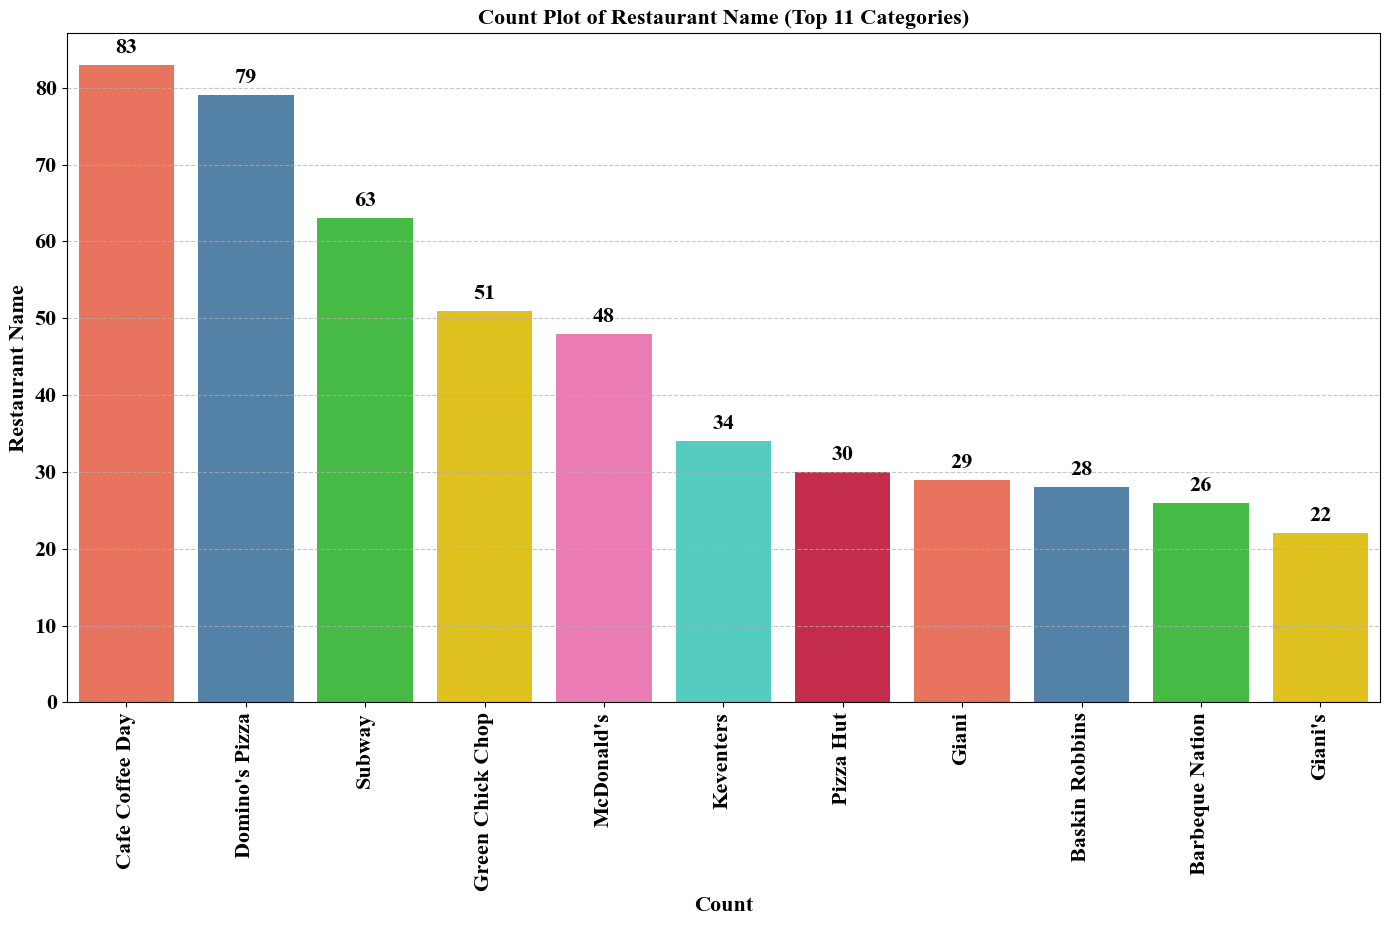

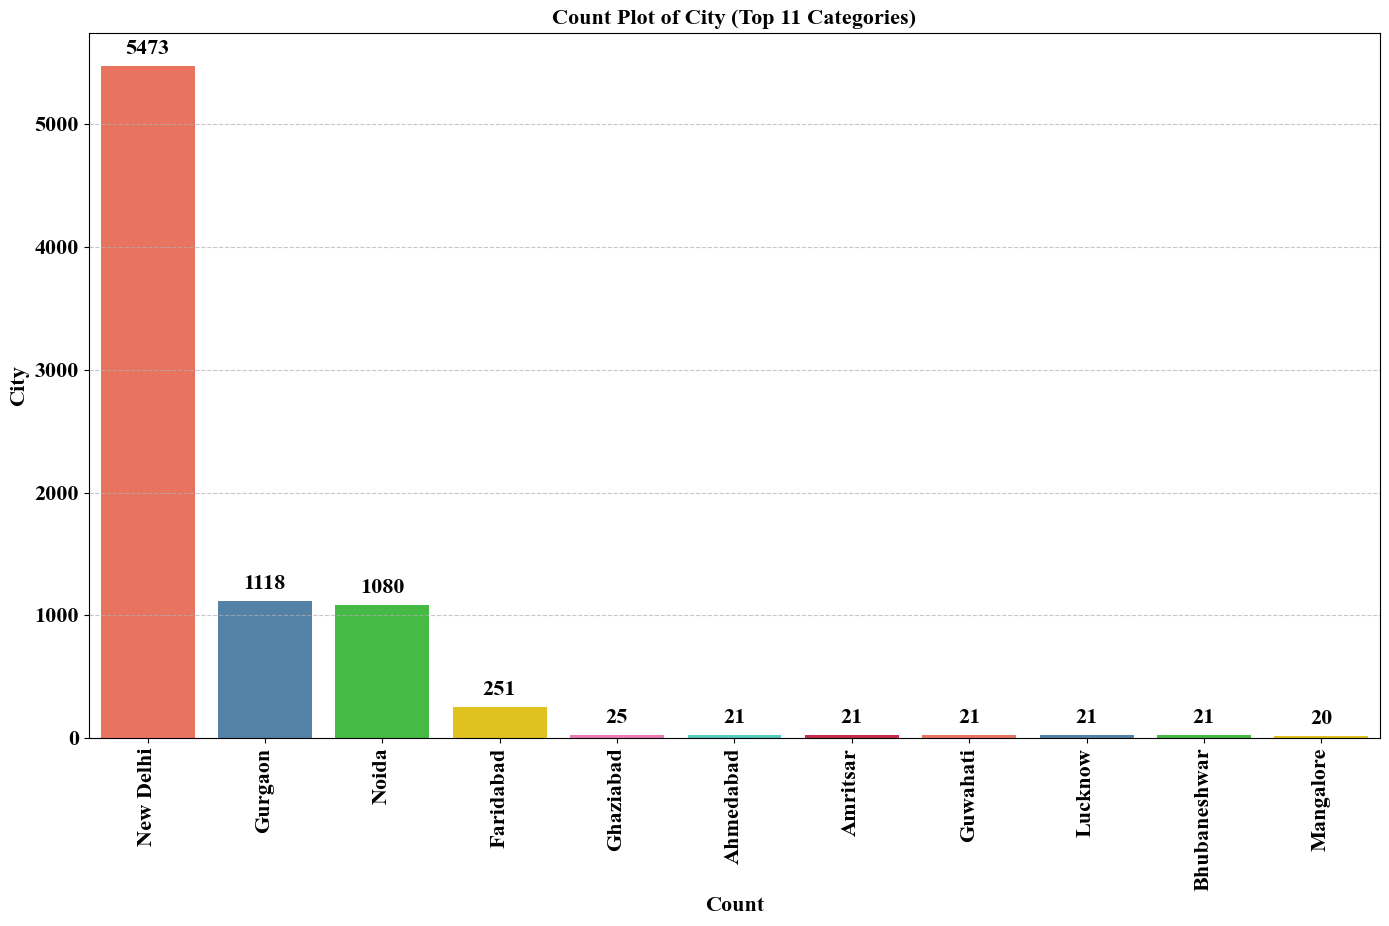

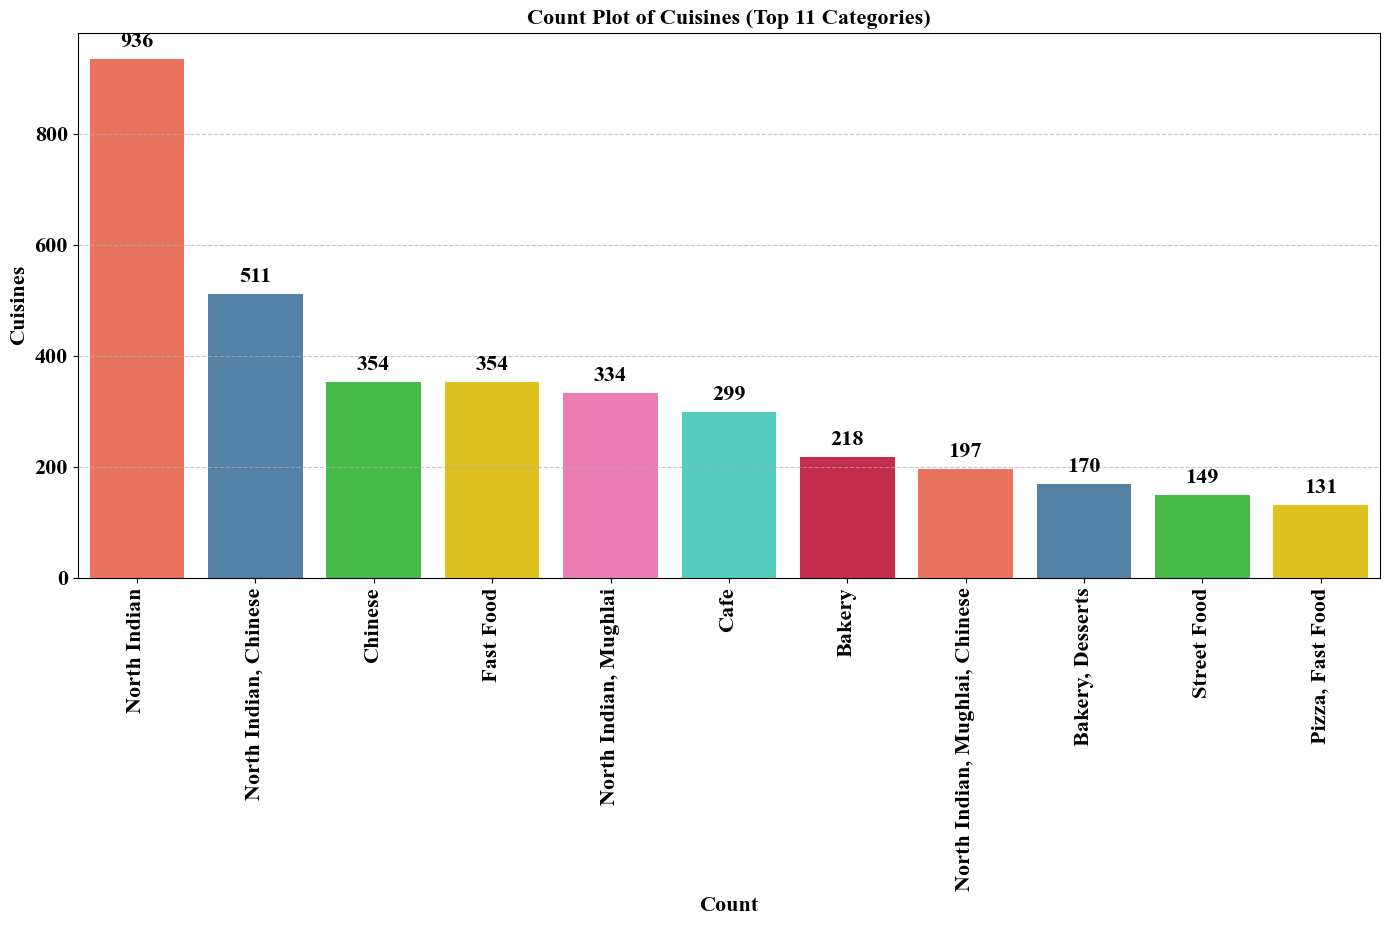

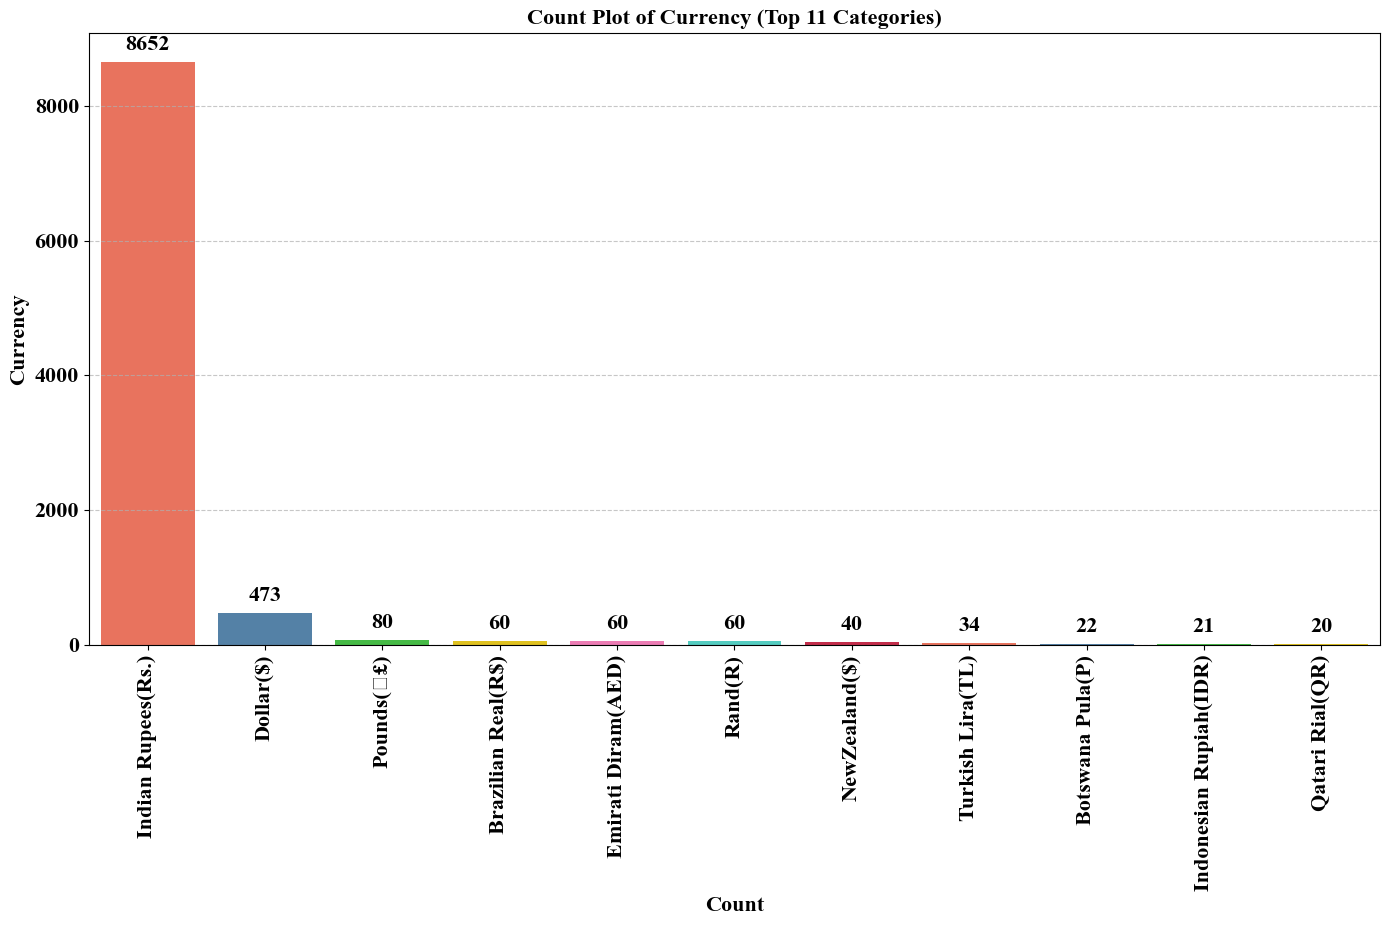

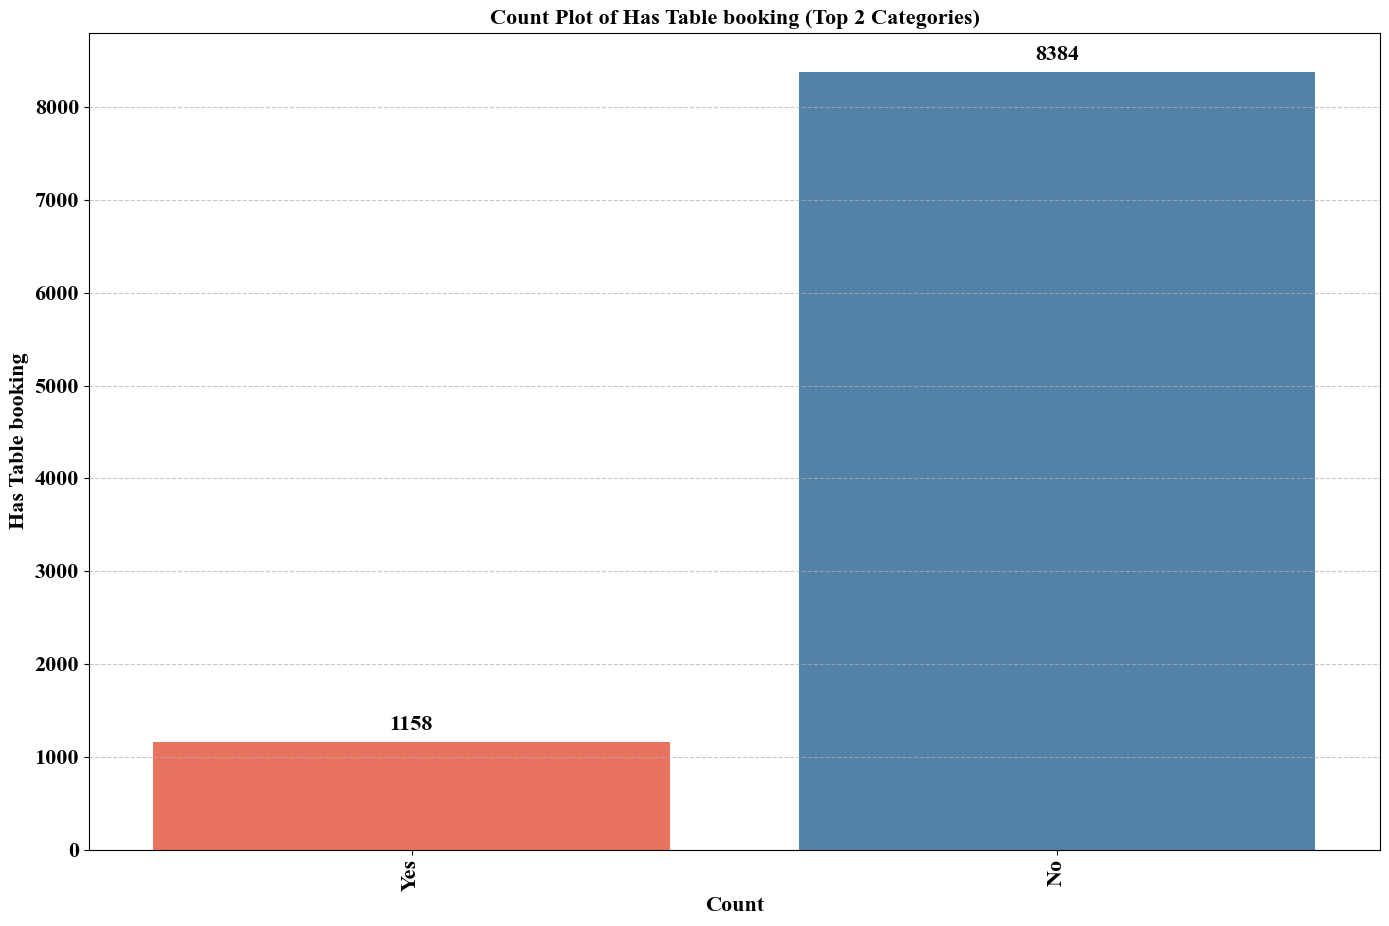

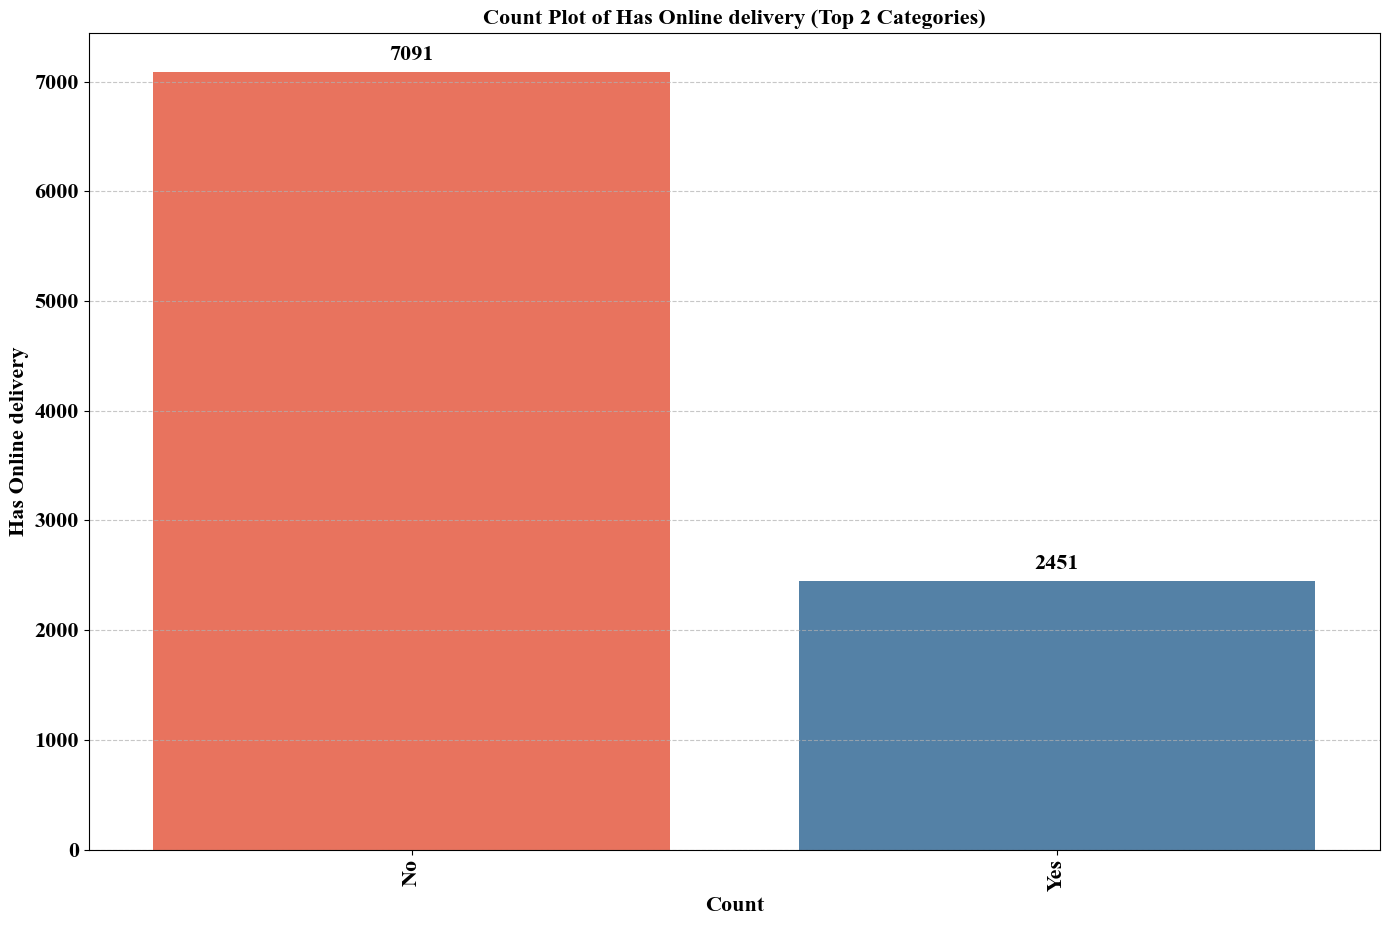

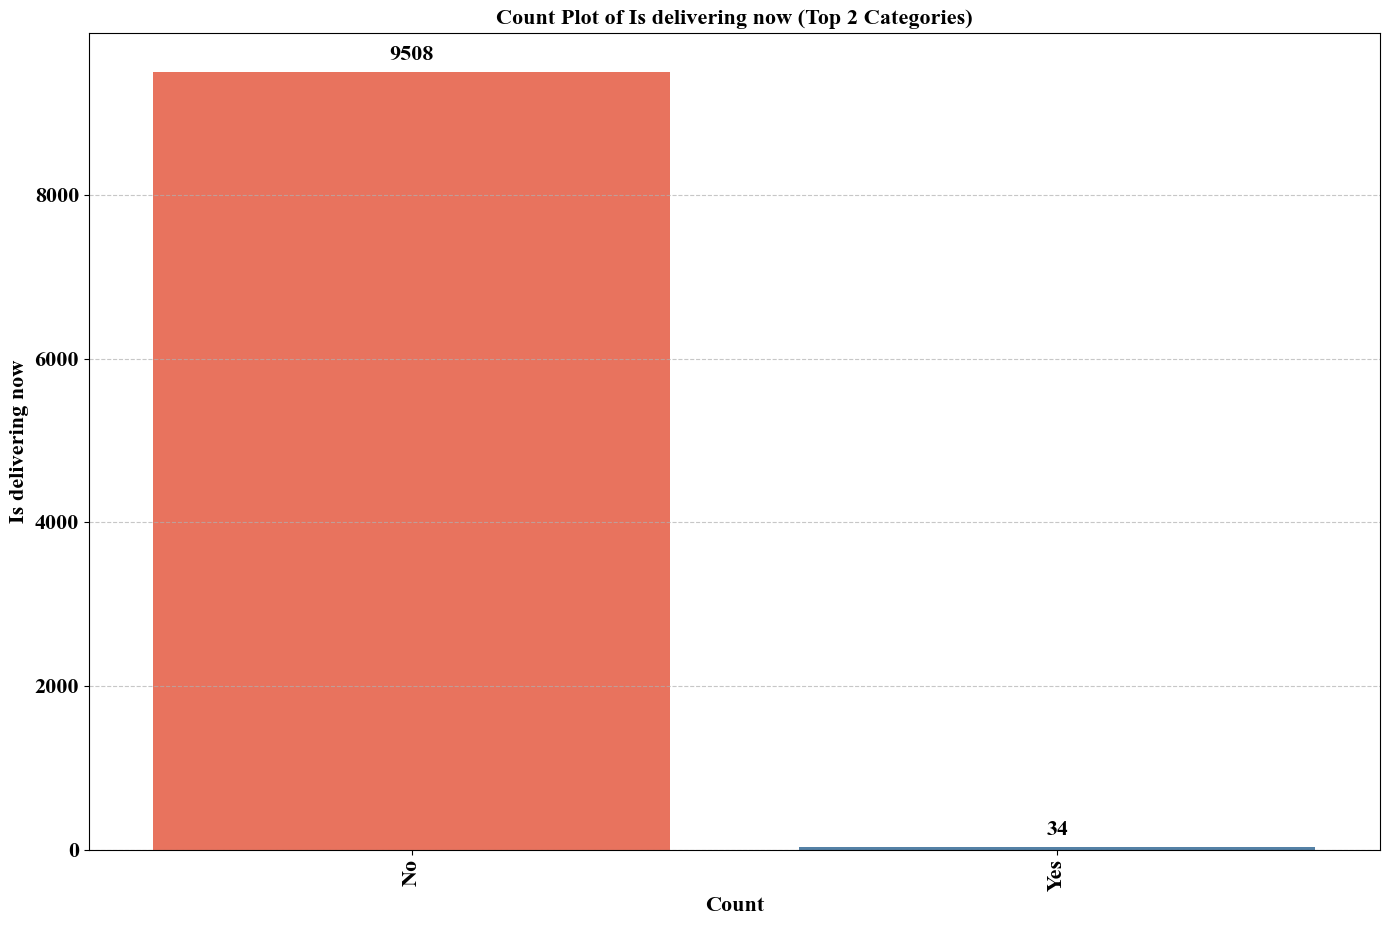

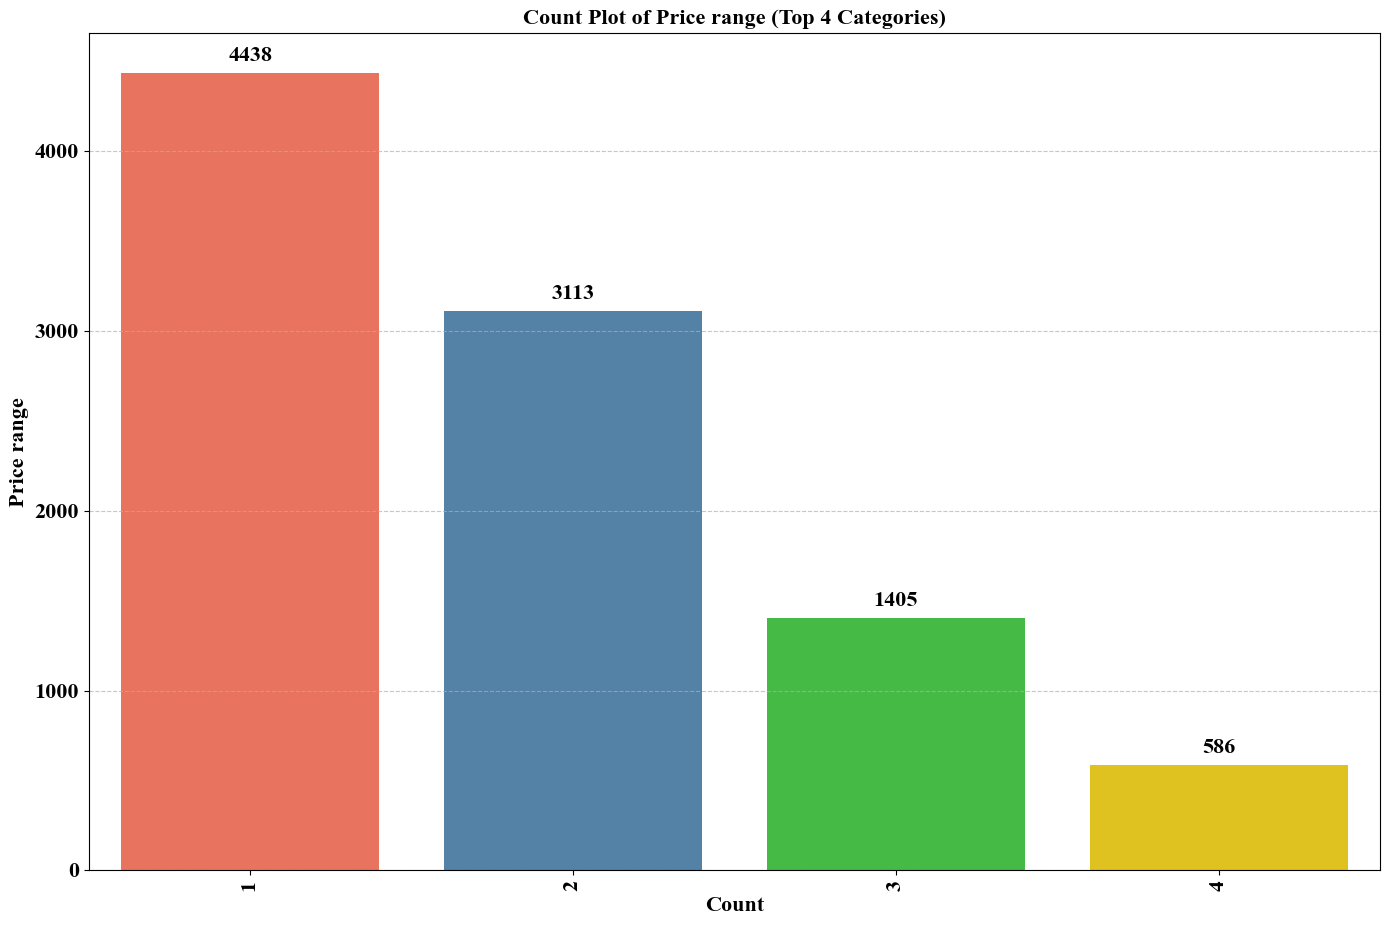

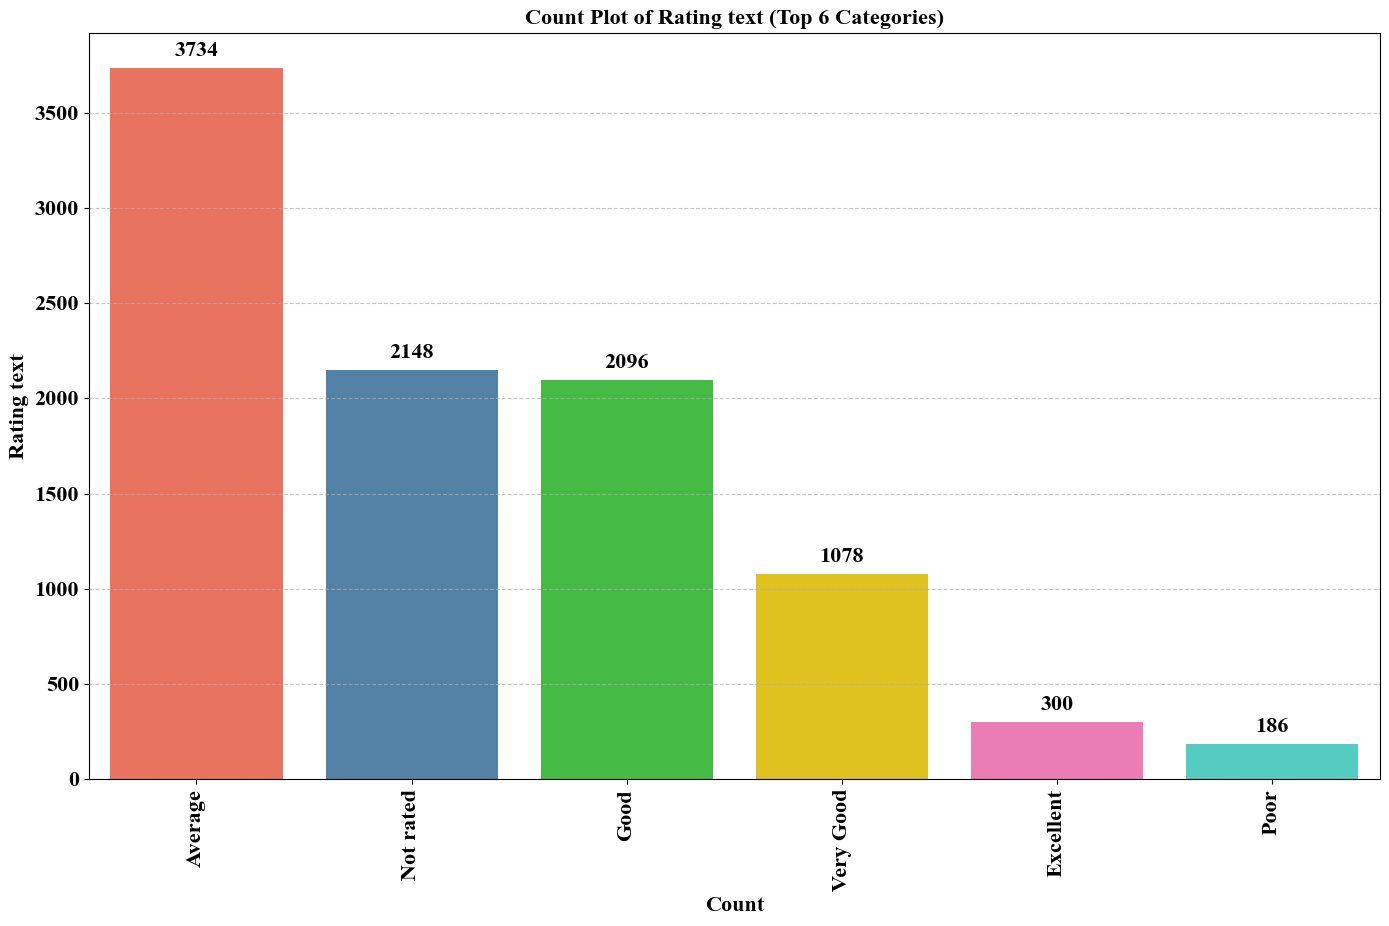

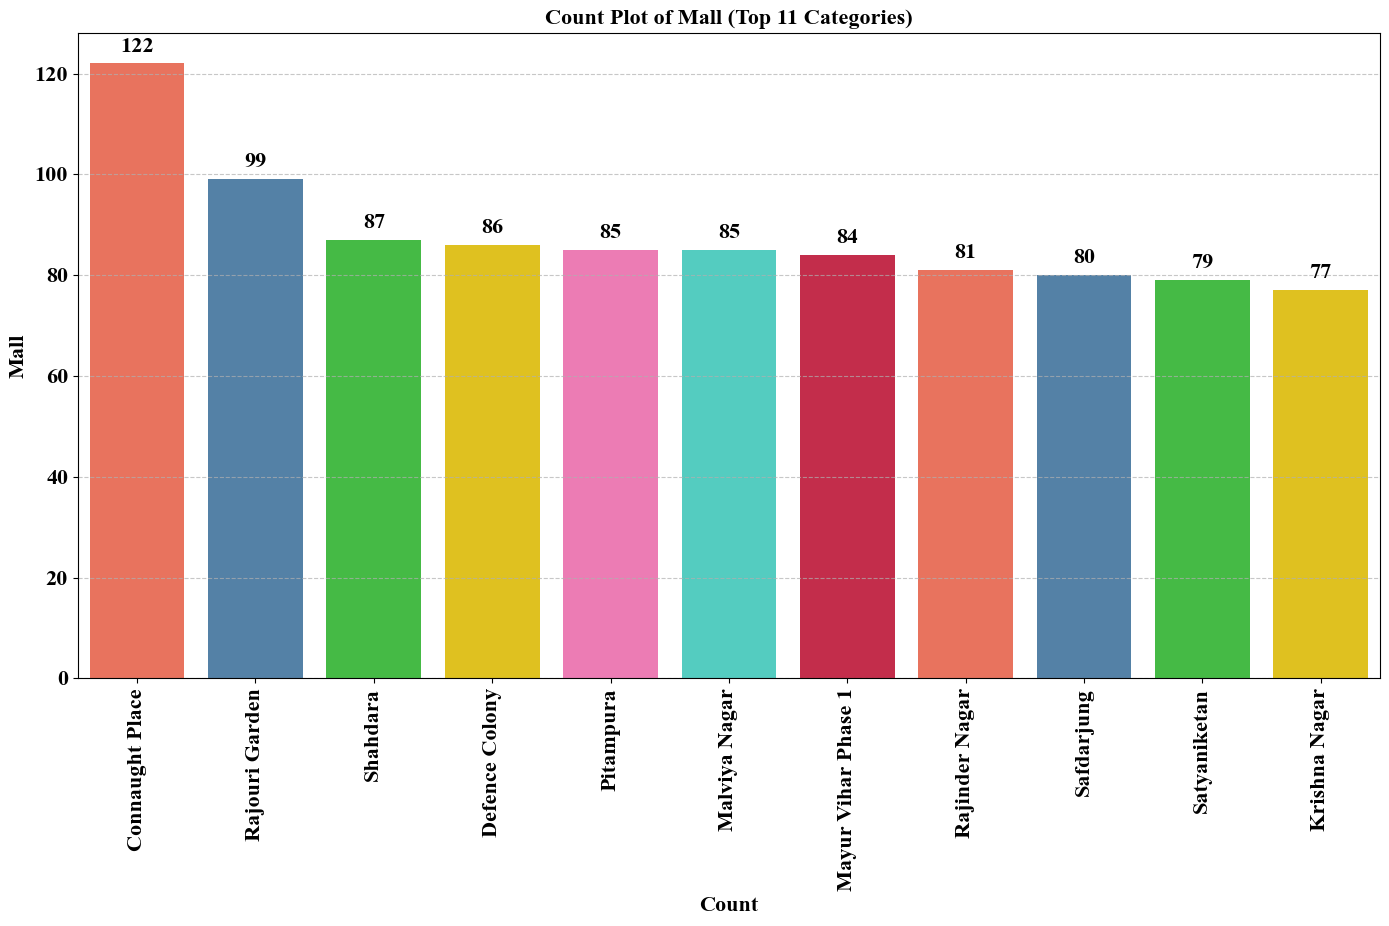

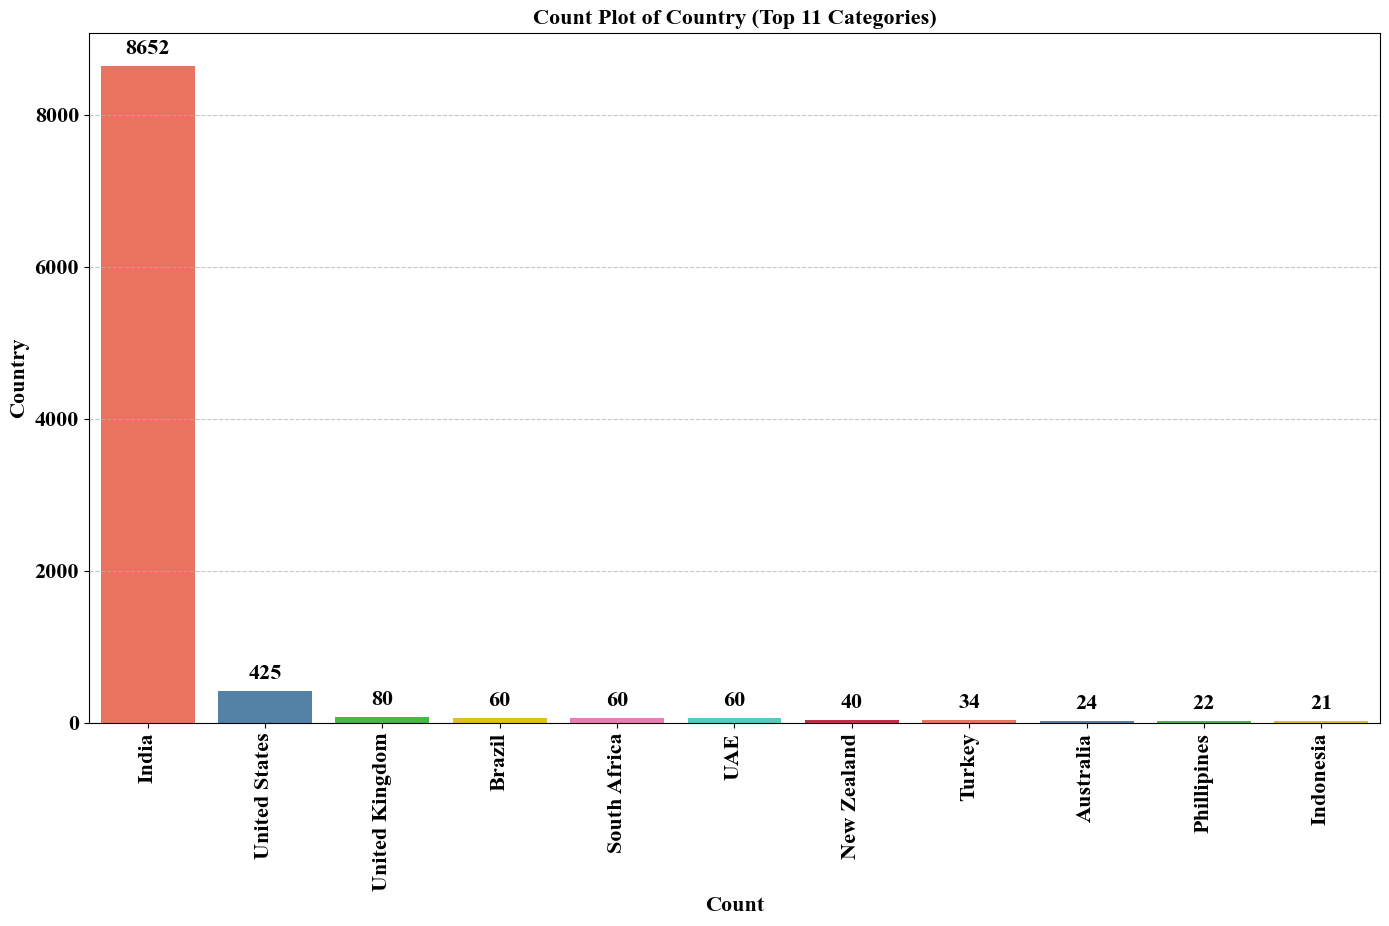

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define alternative bright colors
bright_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#FF69B4', '#40E0D0', '#DC143C']

def plot_countplots_for_categorical_columns(data, columns):
    """
    Plots count plots for specified categorical columns in the DataFrame with bright colors and annotates counts.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    columns (list of str): List of categorical column names to plot.
    """
    for i, column in enumerate(columns):
        plt.figure(figsize=(14, 8))  # Increase figure height
        
        # Determine the top categories based on the number of unique values
        num_categories = data[column].nunique()
        if num_categories <= 2:
            top_categories = data[column].unique()
        else:
            top_categories = data[column].value_counts().nlargest(11).index
        
        # Filter data to include only the top categories
        filtered_df = data[data[column].isin(top_categories)]
        
        # Plot count plot
        ax = sns.countplot(
            x=filtered_df[column], 
            order=top_categories,
            palette=bright_colors[:len(top_categories)]  # Use a slice of bright colors for the top categories
        )
        
        # Annotate the bars with counts
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            # Ensure height is positive and not zero
            if height > 0:
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom',
                            fontsize=16, fontweight='bold', family='Times New Roman',
                            xytext=(0, 5), textcoords='offset points')

        plt.title(f'Count Plot of {column} (Top {len(top_categories)} Categories)', fontsize=16, fontweight='bold', family='Times New Roman')
        plt.xlabel('Count', fontsize=16, fontweight='bold', family='Times New Roman')
        plt.ylabel(column, fontsize=16, fontweight='bold', family='Times New Roman')
        plt.xticks(rotation=90, fontsize=16, fontweight='bold', family='Times New Roman')  # Rotate x-axis labels
        plt.yticks(fontsize=16, fontweight='bold', family='Times New Roman')
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
        plt.tight_layout(rect=[0, 0.03, 1, 1.2])  # Adjust layout to fit labels and title
        plt.show()

# List of categorical columns
categorical_columns = [
    'Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 
    'Is delivering now', 'Price range', 'Rating text', 'Mall', 'Country'
]

# Example usage
plot_countplots_for_categorical_columns(data, categorical_columns)

### **Picharts**

In [145]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Alternative bright colors
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def display_pie_chart_plotly(data, column):
    """
    Displays a pie chart for a specified categorical column in the DataFrame using Plotly.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    column (str): The column name to plot.
    """
    # Determine if the column has more than 2 unique categories
    if data[column].nunique() > 2:
        # Get the top 5 most frequent categories
        top_categories = data[column].value_counts().nlargest(5).index
        filtered_df = data[data[column].isin(top_categories)]
        title = f'Data Distribution of {column} (Top 5 Categories)'
    else:
        filtered_df = data
        title = f'Data Distribution of {column}'

    # Create a DataFrame for Plotly with proper column names
    count_df = filtered_df[column].value_counts().reset_index()
    count_df.columns = [column, 'Count']
    
    # Ensure only top 5 categories are displayed if applicable
    count_df = count_df[count_df[column].isin(top_categories)] if data[column].nunique() > 2 else count_df

    # Create the Plotly pie chart
    fig = go.Figure(data=[go.Pie(labels=count_df[column], 
                                 values=count_df['Count'], 
                                 marker=dict(colors=bright_colors[:len(count_df[column].unique())]),
                                 hole=0.3,  # Size of the hole in the middle of the pie chart
                                 textinfo='percent+label',  # Display both percent and label in the hoverinfo
                                 pull=[0.1] * len(count_df))])  # Pull each slice of the pie chart away from the center slightly
    
    # Update traces to display text labels on hover
    fig.update_traces(hoverinfo='label+value+percent', 
                      textfont_size=15)  # Set the font size for text
    
    # Update layout for better readability
    fig.update_layout(title=f'<b>{title}</b>',
                      title_x=0.5,  # Center the title
                      margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
                      showlegend=False)  # Hide legend
    
    fig.show()

# List of categorical columns
categorical_columns = [
    'Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
    'Has Online delivery', 'Is delivering now', 'Price range', 'Rating color', 
    'Rating text', 'Mall', 'Country'
]

# Display pie charts for each categorical column using Plotly
for column in categorical_columns:
    display_pie_chart_plotly(data, column)


KeyError: 'Rating color'

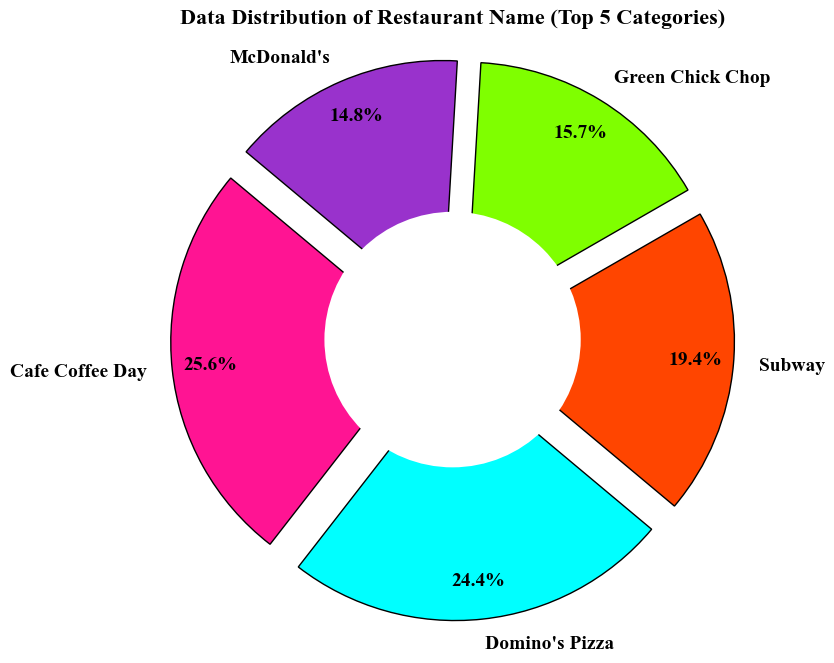

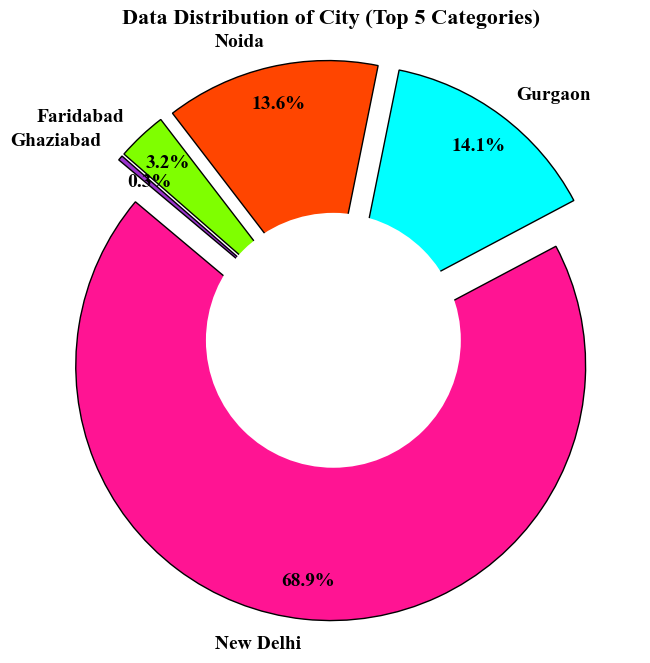

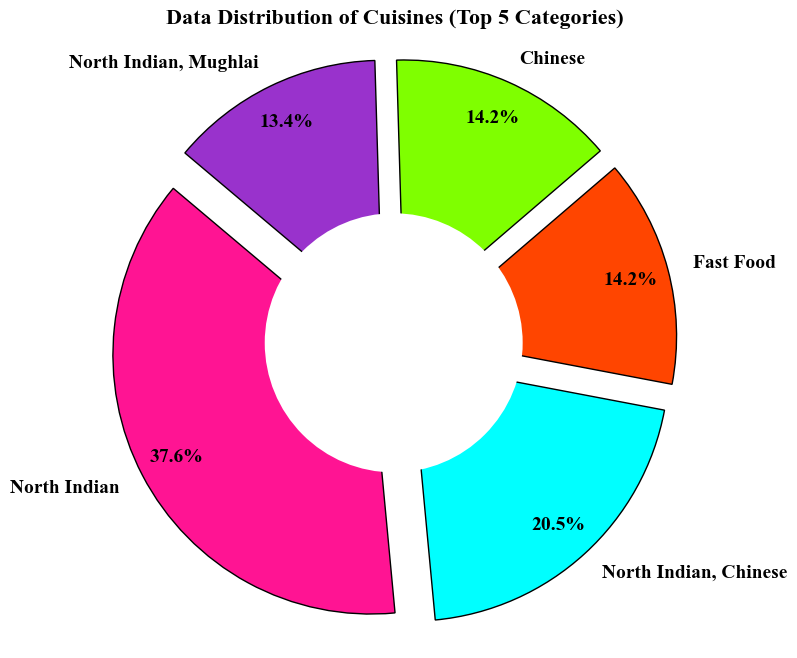

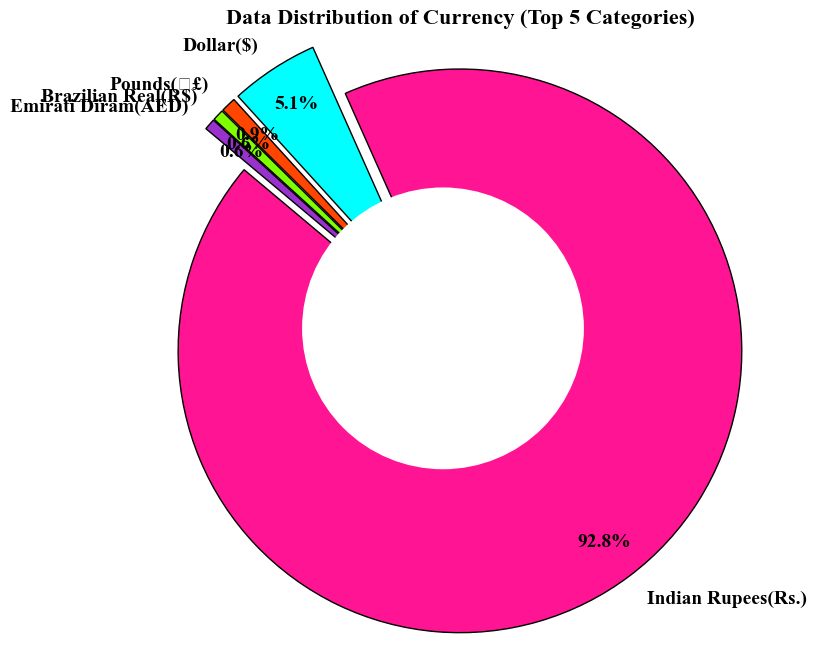

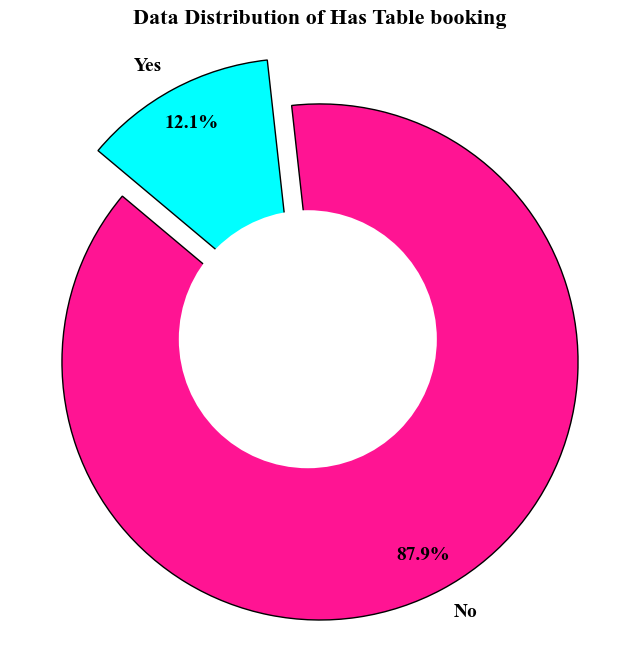

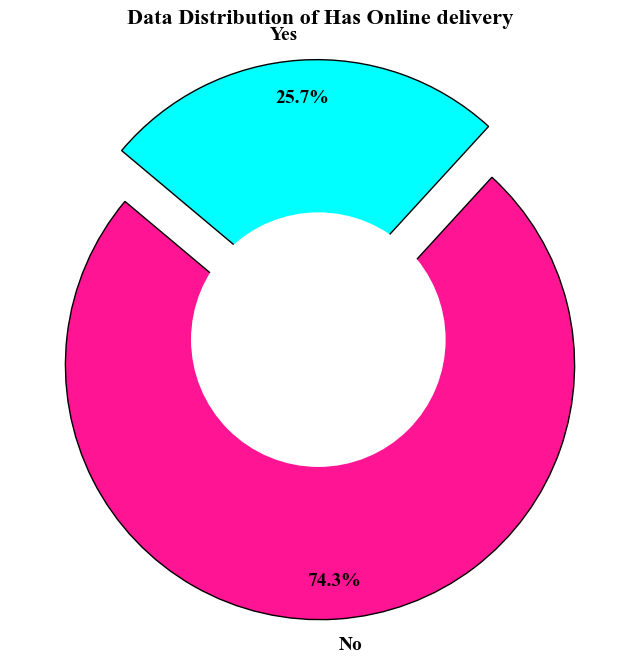

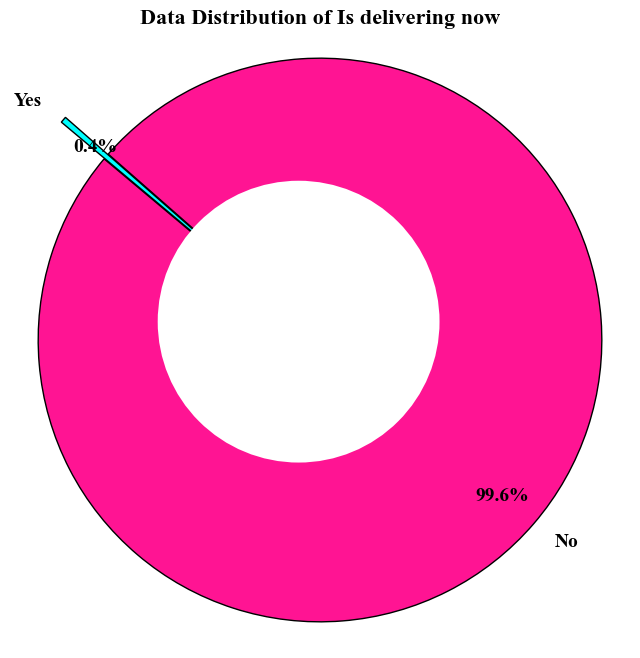

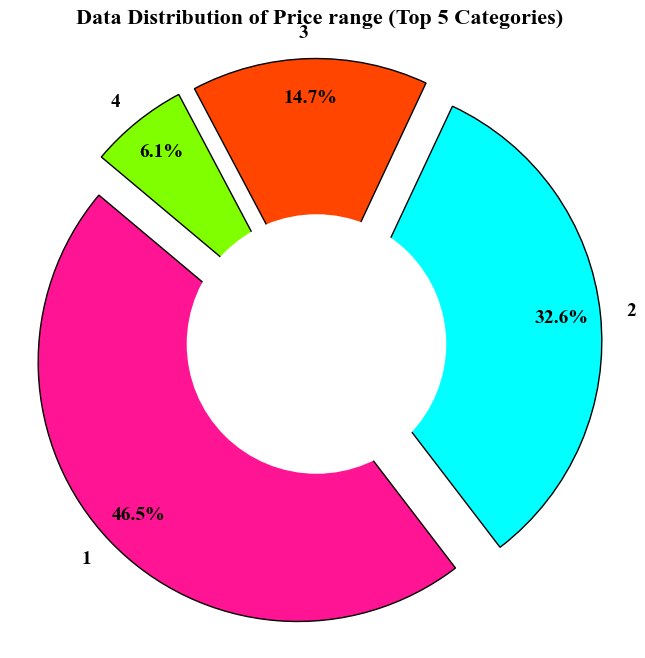

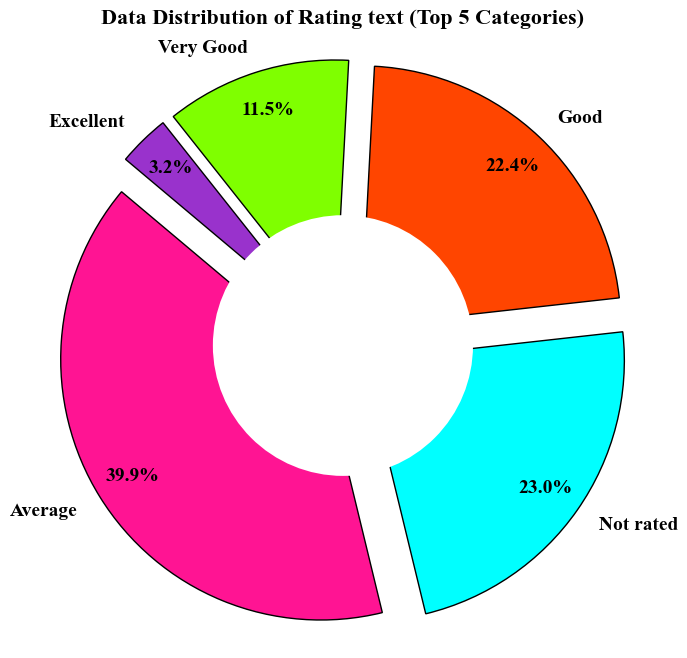

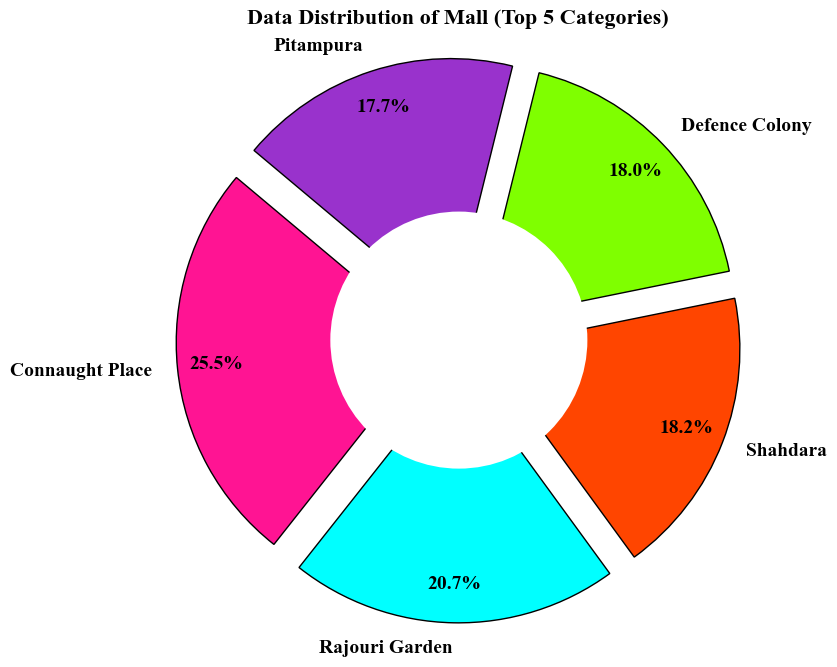

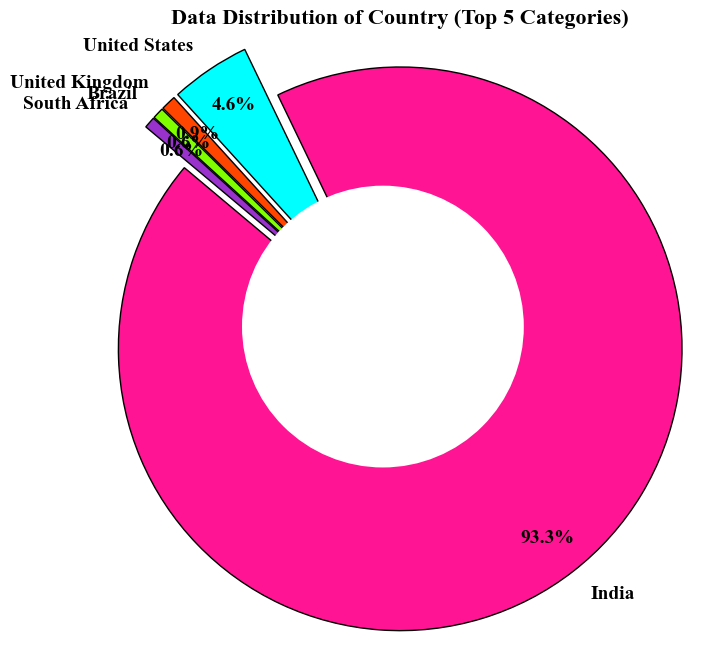

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

# Alternative bright colors
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def display_pie_chart_matplotlib(data, column):
    """
    Displays a pie chart for a specified categorical column in the DataFrame using Matplotlib.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    column (str): The column name to plot.
    """
    # Determine if the column has more than 2 unique categories
    if data[column].nunique() > 2:
        # Get the top 5 most frequent categories
        top_categories = data[column].value_counts().nlargest(5).index
        filtered_df = data[data[column].isin(top_categories)]
        title = f'Data Distribution of {column} (Top 5 Categories)'
    else:
        filtered_df = data
        title = f'Data Distribution of {column}'

    # Create a DataFrame for the plot with proper column names
    count_df = filtered_df[column].value_counts().reset_index()
    count_df.columns = [column, 'Count']
    
    # Ensure only top 5 categories are displayed if applicable
    count_df = count_df[count_df[column].isin(top_categories)] if data[column].nunique() > 2 else count_df

    # Create the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(count_df['Count'], 
                                      labels=count_df[column], 
                                      colors=bright_colors[:len(count_df[column].unique())], 
                                      autopct='%1.1f%%', 
                                      startangle=140, 
                                      pctdistance=0.85,  # Distance of percent text from center
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, 
                                      explode=[0.1] * len(count_df))  # Pull each slice of the pie chart away from the center slightly
    
    # Draw circle in the center to make it a donut chart
    centre_circle = plt.Circle((0,0),0.5,fc='white')
    fig.gca().add_artist(centre_circle)
    
    # Title settings
    plt.title(title, fontsize=16, weight='bold', family='Times New Roman')
    
    # Font properties for texts and autotexts
    plt.setp(texts, size=14, weight='bold', family='Times New Roman')
    plt.setp(autotexts, size=14, weight='bold', family='Times New Roman')
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    
    # Remove legend
    ax.legend().set_visible(False)
    
    plt.show()

# List of categorical columns
categorical_columns = [
    'Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
    'Has Online delivery', 'Is delivering now', 'Price range', 
    'Rating text', 'Mall', 'Country'
]

# Display pie charts for each categorical column using Matplotlib
for column in categorical_columns:
    display_pie_chart_matplotlib(data, column)

## **Numarical Data**

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Bright colors for consistency
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# def display_histogram_matplotlib(data, column):
#     """
#     Displays a histogram for a specified numerical column in the DataFrame using Matplotlib.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     column (str): The column name to plot.
#     """
#     # Create the histogram
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     n, bins, patches = ax.hist(data[column].dropna(), bins=30, color=bright_colors[0], edgecolor='black', alpha=0.7)

#     # Set color for each patch (bin)
#     for patch, color in zip(patches, bright_colors[:len(patches)]):
#         patch.set_facecolor(color)

#     # Title and labels settings
#     ax.set_title(f'Distribution of {column}', fontsize=16, weight='bold', family='Times New Roman')
#     ax.set_xlabel(column, fontsize=14, weight='bold', family='Times New Roman')
#     ax.set_ylabel('Frequency', fontsize=14, weight='bold', family='Times New Roman')
    
#     # Font properties for tick labels
#     plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
#     plt.yticks(fontsize=12, weight='bold', family='Times New Roman')
    
#     plt.show()

# # List of numerical columns
# numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

# # Display histograms for each numerical column using Matplotlib
# for column in numerical_columns:
#     display_histogram_matplotlib(data, column)

## Distplot

In [ ]:
# import plotly.figure_factory as ff
# import pandas as pd

# # Bright colors for consistency
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# def display_distplot_plotly(data, column):
#     """
#     Displays a distplot for a specified numerical column in the DataFrame using Plotly,
#     and shows the skewness of the data.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     column (str): The column name to plot.
#     """
#     skewness = data[column].skew()
    
#     # Create the distplot
#     fig = ff.create_distplot([data[column].dropna()], [column], bin_size=0.5, colors=bright_colors[:1])

#     # Update layout for better readability and styling
#     fig.update_layout(
#         title={
#             'text': f'Distribution of {column}<br>Skewness: {skewness:.2f}',
#             'y':0.9,
#             'x':0.5,
#             'xanchor': 'center',
#             'yanchor': 'top',
#             'font': dict(family='Times New Roman', size=16, color='black', weight='bold')
#         },
#         xaxis_title=column,
#         yaxis_title='Frequency',
#         xaxis=dict(
#             tickfont=dict(family='Times New Roman', size=14, color='black', weight='bold')
#         ),
#         yaxis=dict(
#             tickfont=dict(family='Times New Roman', size=14, color='black', weight='bold')
#         ),
#         template='plotly_white'
#     )

#     fig.show()

# # List of numerical columns
# numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

# # Display distplots for each numerical column using Plotly
# for column in numerical_columns:
#     display_distplot_plotly(data, column)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Bright colors for consistency
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# def display_distplot_seaborn(data, column):
#     """
#     Displays a distplot for a specified numerical column in the DataFrame using Seaborn,
#     and shows the skewness of the data.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     column (str): The column name to plot.
#     """
#     skewness = data[column].skew()

#     # Create the distplot
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data[column].dropna(), bins=30, kde=True, color=bright_colors[0], edgecolor='black', alpha=0.7)

#     # Title and labels settings
#     plt.title(f'Distribution of {column}\nSkewness: {skewness:.2f}', fontsize=16, weight='bold', family='Times New Roman')
#     plt.xlabel(column, fontsize=14, weight='bold', family='Times New Roman')
#     plt.ylabel('Frequency', fontsize=14, weight='bold', family='Times New Roman')

#     # Font properties for tick labels
#     plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
#     plt.yticks(fontsize=12, weight='bold', family='Times New Roman')

#     plt.show()

# # List of numerical columns
# numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

# # Display distplots for each numerical column using Seaborn
# for column in numerical_columns:
#     display_distplot_seaborn(data, column)

# VioLinPlot

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Bright colors for consistency
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# def display_violinplot_seaborn(data, column):
#     """
#     Displays a violin plot for a specified numerical column in the DataFrame using Seaborn,
#     and shows the skewness of the data.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     column (str): The column name to plot.
#     """
#     skewness = data[column].skew()

#     # Create the violin plot
#     plt.figure(figsize=(10, 6))
#     sns.violinplot(x=data[column], color=bright_colors[0])

#     # Title and labels settings
#     plt.title(f'Distribution of {column} (Violin Plot)\nSkewness: {skewness:.2f}', fontsize=16, weight='bold', family='Times New Roman')
#     plt.xlabel(column, fontsize=14, weight='bold', family='Times New Roman')
#     plt.ylabel('Density', fontsize=14, weight='bold', family='Times New Roman')

#     # Font properties for tick labels
#     plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
#     plt.yticks(fontsize=12, weight='bold', family='Times New Roman')

#     plt.show()

# # List of numerical columns
# numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

# # Display violin plots for each numerical column using Seaborn
# for column in numerical_columns:
#     display_violinplot_seaborn(data, column)

In [ ]:
# import plotly.express as px
# import pandas as pd

# # Bright colors for consistency
# bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

# def display_violinplot_plotly(data, column):
#     """
#     Displays a violin plot for a specified numerical column in the DataFrame using Plotly,
#     and shows the skewness of the data.

#     Parameters:
#     data (pd.DataFrame): The DataFrame containing the data to plot.
#     column (str): The column name to plot.
#     """
#     skewness = data[column].skew()

#     # Create the violin plot
#     fig = px.violin(data, y=column, color_discrete_sequence=bright_colors[:1])

#     # Update layout for better readability and styling
#     fig.update_layout(
#         title={
#             'text': f'Distribution of {column} (Violin Plot)<br>Skewness: {skewness:.2f}',
#             'y':0.9,
#             'x':0.5,
#             'xanchor': 'center',
#             'yanchor': 'top',
#             'font': dict(family='Times New Roman', size=16, color='black', weight='bold')
#         },
#         xaxis_title=column,
#         yaxis_title='Density',
#         xaxis=dict(
#             tickfont=dict(family='Times New Roman', size=14, color='black', weight='bold')
#         ),
#         yaxis=dict(
#             tickfont=dict(family='Times New Roman', size=14, color='black', weight='bold')
#         ),
#         showlegend=False,
#         template='plotly_white'
#     )

#     fig.show()

# # List of numerical columns
# numerical_columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

# # Display violin plots for each numerical column using Plotly
# for column in numerical_columns:
#     display_violinplot_plotly(data, column)

## **BiVariate Analysis**

In [ ]:
data.head(2)

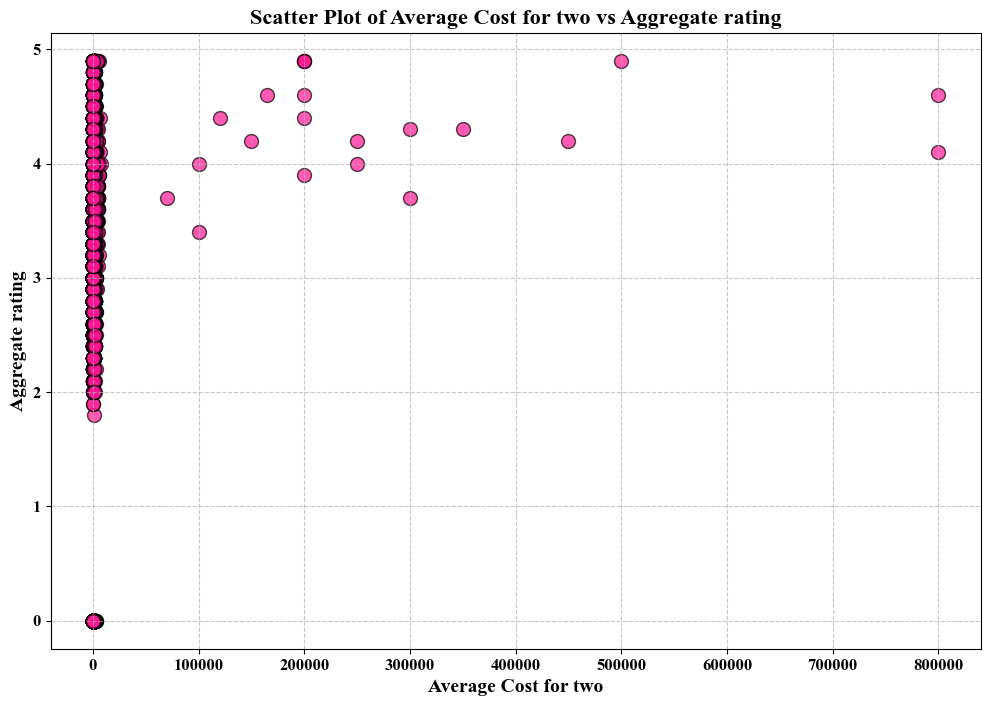

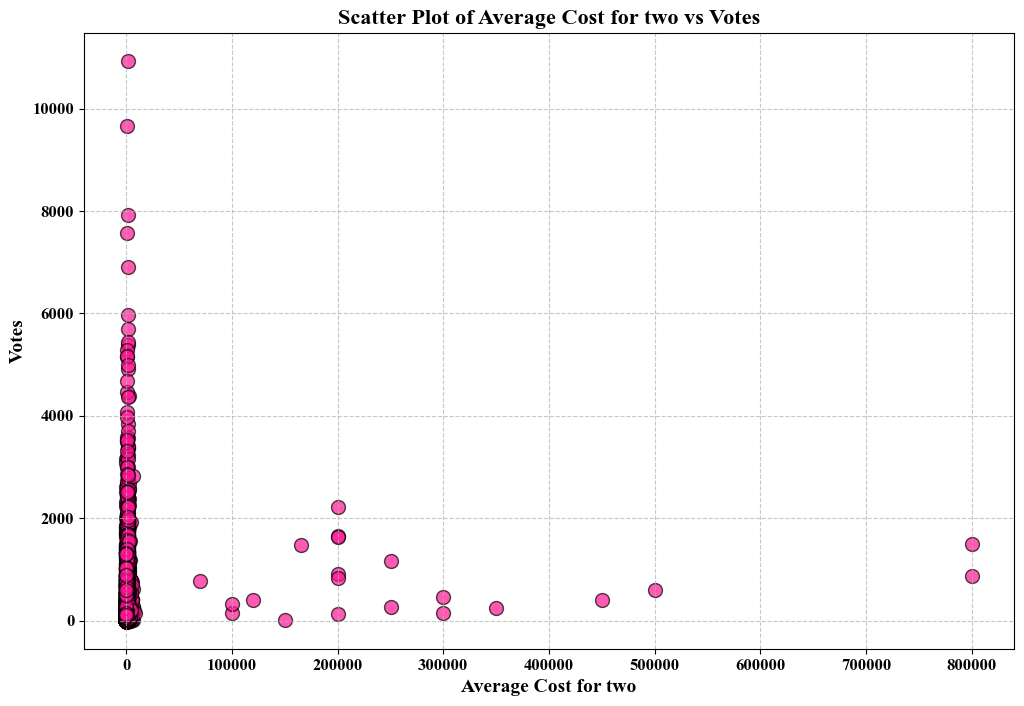

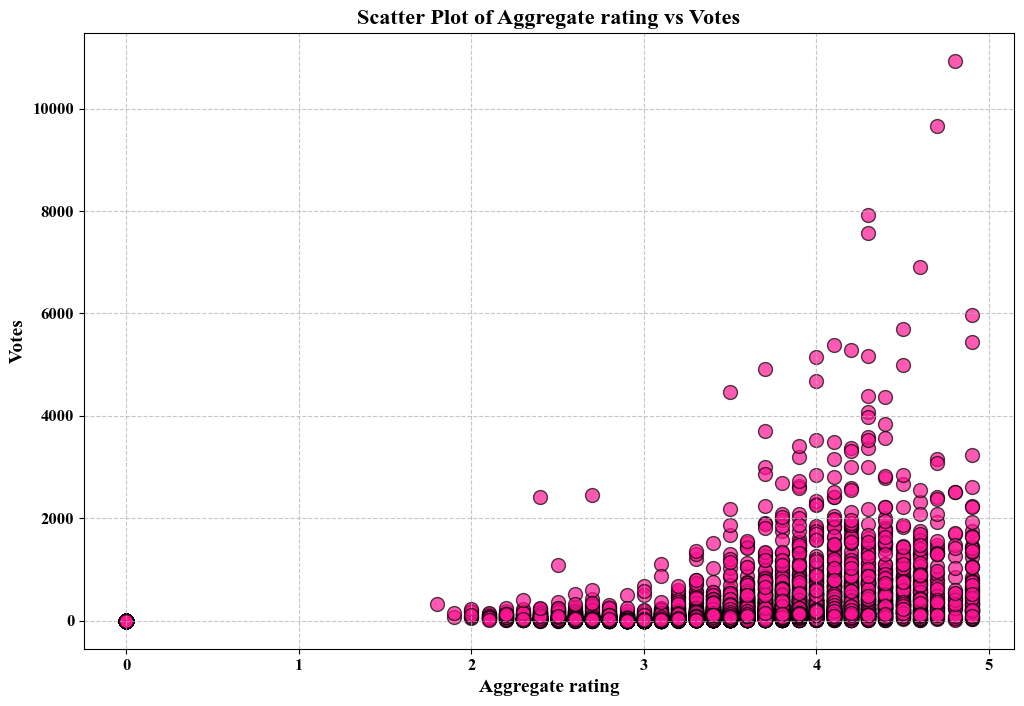

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bright colors for consistency
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def scatter_plot_matplotlib(data, num_columns):
    """
    Creates scatter plots for comparing each pair of numerical columns in the DataFrame using Matplotlib.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    num_columns (list of str): List of numerical column names to compare.
    """
    num_cols = len(num_columns)
    
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            x_col = num_columns[i]
            y_col = num_columns[j]
            
            plt.figure(figsize=(12, 8))
            
            # Create scatter plot
            plt.scatter(data[x_col], data[y_col], 
                        c=bright_colors[0],  # Use bright color for points
                        edgecolor='black',   # Black edge for better contrast
                        alpha=0.7,           # Adjust transparency
                        s=100)               # Size of the markers
            
            # Title and labels settings
            plt.title(f'Scatter Plot of {x_col} vs {y_col}', fontsize=16, weight='bold', family='Times New Roman')
            plt.xlabel(x_col, fontsize=14, weight='bold', family='Times New Roman')
            plt.ylabel(y_col, fontsize=14, weight='bold', family='Times New Roman')
            
            # Font properties for tick labels
            plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
            plt.yticks(fontsize=12, weight='bold', family='Times New Roman')

            # Add grid for better readability
            plt.grid(True, linestyle='--', alpha=0.7)
            
            plt.show()

# List of numerical columns
numerical_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']

# Display scatter plots for each pair of numerical columns using Matplotlib
scatter_plot_matplotlib(data, numerical_columns)

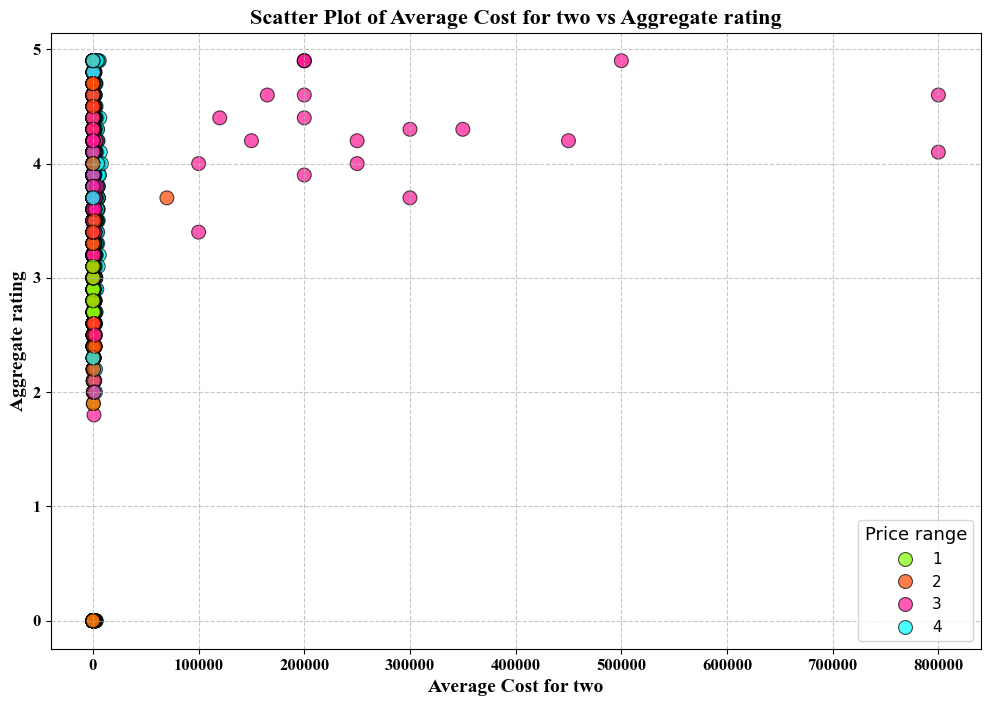

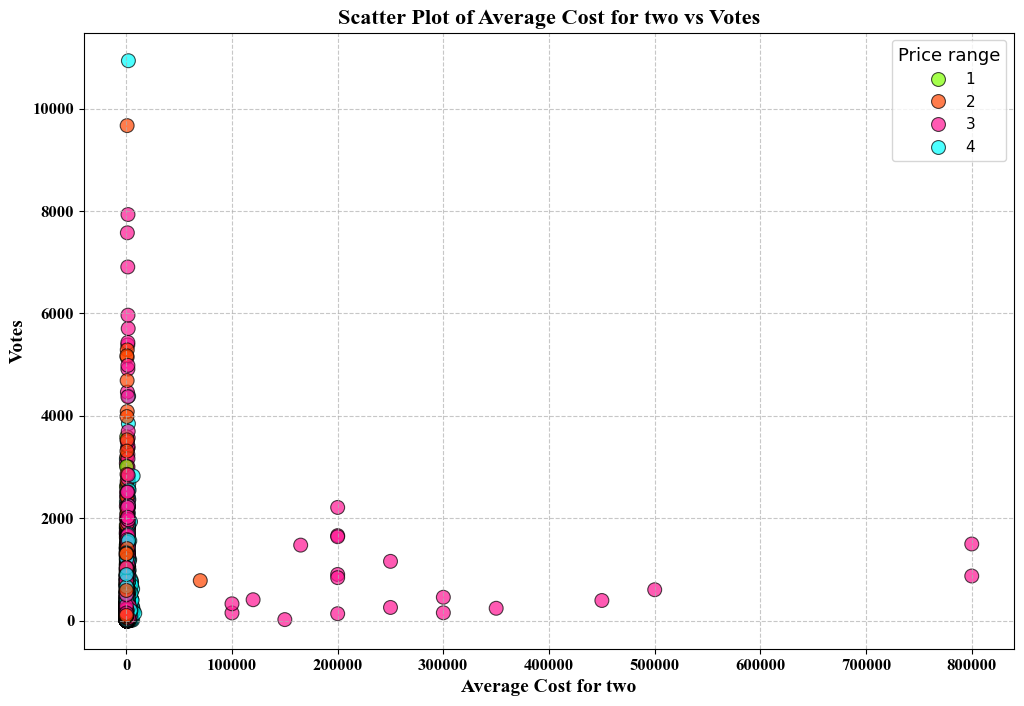

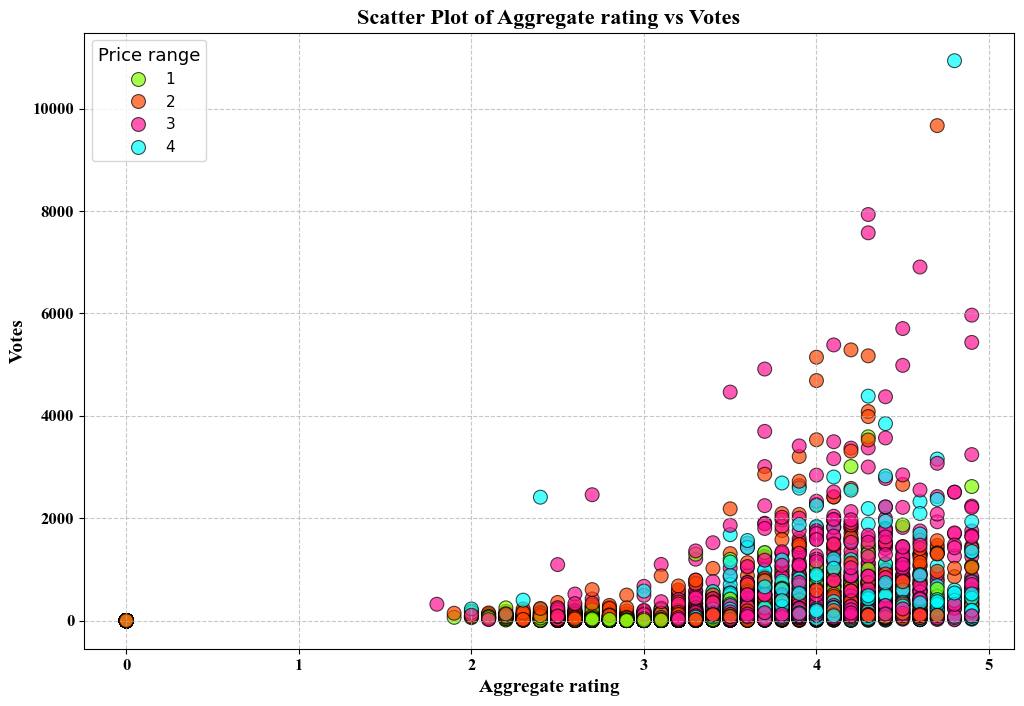

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bright colors for consistency
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def scatter_plot_matplotlib(data, num_columns, hue_column):
    """
    Creates scatter plots for comparing each pair of numerical columns in the DataFrame using Matplotlib,
    with color coding based on a categorical hue column.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    num_columns (list of str): List of numerical column names to compare.
    hue_column (str): The categorical column name to use for color coding.
    """
    num_cols = len(num_columns)
    unique_hues = data[hue_column].unique()
    hue_colors = bright_colors[:len(unique_hues)]
    hue_palette = dict(zip(unique_hues, hue_colors))
    
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            x_col = num_columns[i]
            y_col = num_columns[j]
            
            plt.figure(figsize=(12, 8))
            
            # Create scatter plot with hue
            sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_column, palette=hue_palette, 
                            edgecolor='black', alpha=0.7, s=100)
            
            # Title and labels settings
            plt.title(f'Scatter Plot of {x_col} vs {y_col}', fontsize=16, weight='bold', family='Times New Roman')
            plt.xlabel(x_col, fontsize=14, weight='bold', family='Times New Roman')
            plt.ylabel(y_col, fontsize=14, weight='bold', family='Times New Roman')
            
            # Font properties for tick labels
            plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
            plt.yticks(fontsize=12, weight='bold', family='Times New Roman')

            # Add grid for better readability
            plt.grid(True, linestyle='--', alpha=0.7)
            
            # Add legend for hue
            plt.legend(title=hue_column, title_fontsize='13', fontsize='11', loc='best')
            
            plt.show()

# List of numerical columns
numerical_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']
# Choose a categorical column for hue
hue_column = 'Price range'

# Display scatter plots for each pair of numerical columns using Matplotlib with hue
scatter_plot_matplotlib(data, numerical_columns, hue_column)

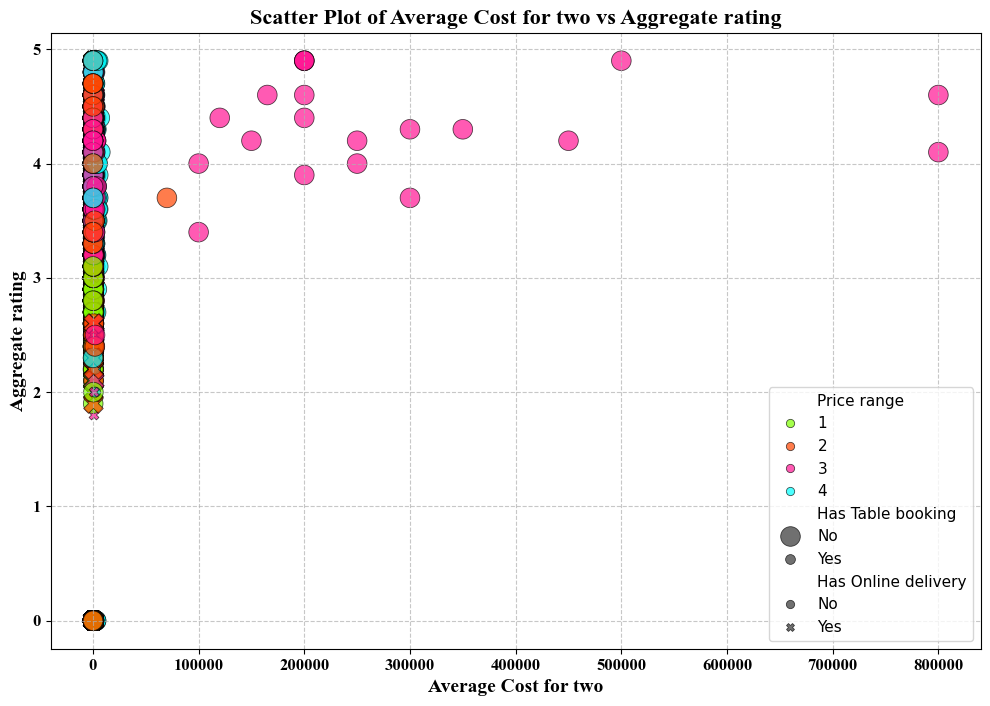

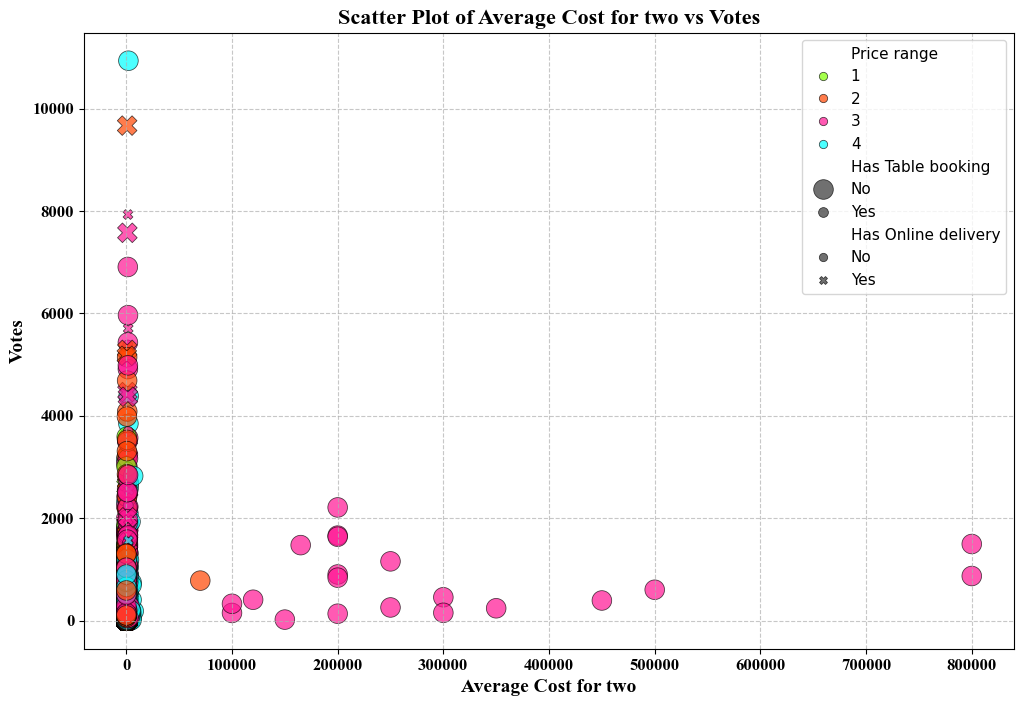

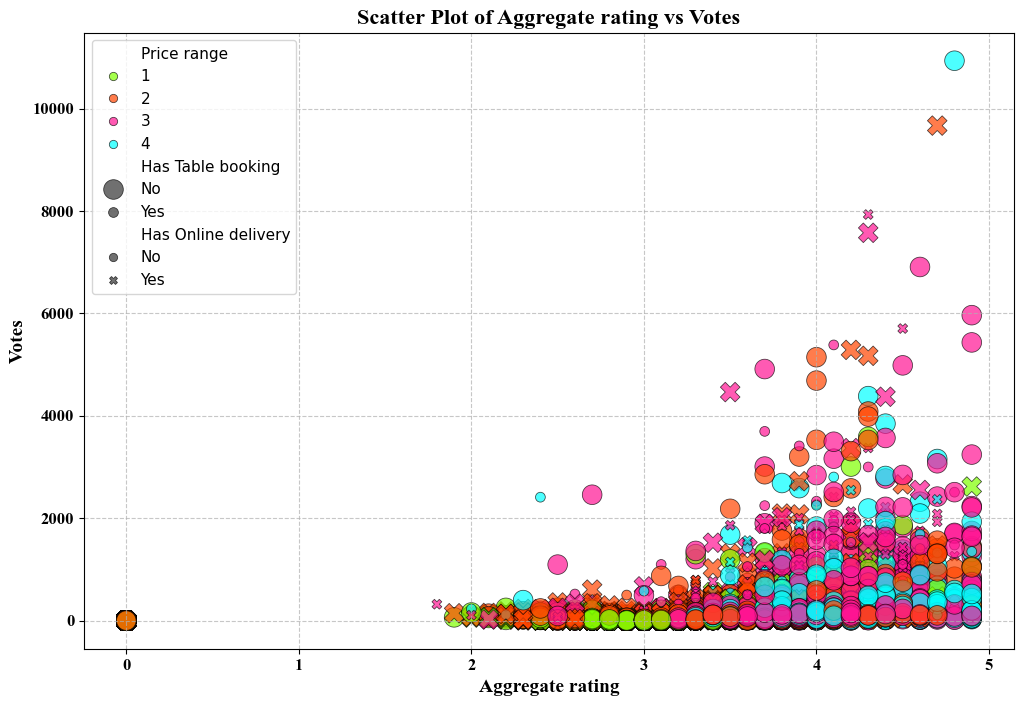

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bright colors for consistency
bright_colors = ['#FF1493', '#00FFFF', '#FF4500', '#7FFF00', '#9932CC', '#00CED1', '#FFD700']

def scatter_plot_matplotlib(data, num_columns, hue_column, size_column, style_column):
    """
    Creates scatter plots for comparing each pair of numerical columns in the DataFrame using Matplotlib,
    with options for hue, size, and style based on categorical columns.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    num_columns (list of str): List of numerical column names to compare.
    hue_column (str): The column name to use for color coding.
    size_column (str): The column name to use for marker size.
    style_column (str): The column name to use for marker style.
    """
    num_cols = len(num_columns)
    unique_hues = data[hue_column].unique()
    hue_colors = bright_colors[:len(unique_hues)]
    hue_palette = dict(zip(unique_hues, hue_colors))
    
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            x_col = num_columns[i]
            y_col = num_columns[j]
            
            plt.figure(figsize=(12, 8))
            
            # Create scatter plot with hue, size, and style
            sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_column, size=size_column, style=style_column,
                            palette=hue_palette, edgecolor='black', alpha=0.7, sizes=(50, 200))
            
            # Title and labels settings
            plt.title(f'Scatter Plot of {x_col} vs {y_col}', fontsize=16, weight='bold', family='Times New Roman')
            plt.xlabel(x_col, fontsize=14, weight='bold', family='Times New Roman')
            plt.ylabel(y_col, fontsize=14, weight='bold', family='Times New Roman')
            
            # Font properties for tick labels
            plt.xticks(fontsize=12, weight='bold', family='Times New Roman')
            plt.yticks(fontsize=12, weight='bold', family='Times New Roman')

            # Add grid for better readability
            plt.grid(True, linestyle='--', alpha=0.7)
            
            # Add legend for hue, size, and style
            plt.legend(title_fontsize='13', fontsize='11', loc='best')
            
            plt.show()

# List of numerical columns
numerical_columns = ['Average Cost for two', 'Aggregate rating', 'Votes']
# Choose categorical columns for hue, size, and style
hue_column = 'Price range'
size_column = 'Has Table booking'
style_column = 'Has Online delivery'

# Display scatter plots for each pair of numerical columns using Matplotlib with hue, size, and style
scatter_plot_matplotlib(data, numerical_columns, hue_column, size_column, style_column)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def filter_top_categories(data, column, top_n=5):
    """
    Filters the DataFrame to only include the top N most frequent categories for a given column.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to filter.
    column (str): The column name to filter.
    top_n (int): Number of top categories to keep.
    
    Returns:
    pd.DataFrame: Filtered DataFrame.
    """
    top_categories = data[column].value_counts().nlargest(top_n).index
    return data[data[column].isin(top_categories)]

def bar_plot_seaborn(data, x_col, y_col, hue_col):
    """
    Creates a bar plot with Seaborn where X-axis is categorical, Y-axis is numerical, and hue is categorical.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    x_col (str): Column name for X-axis (categorical).
    y_col (str): Column name for Y-axis (numerical).
    hue_col (str): Column name for hue (categorical).
    """
    # Filter the top categories for x_col and hue_col
    data_filtered_x = filter_top_categories(data, x_col)
    data_filtered = filter_top_categories(data_filtered_x, hue_col)
    
    plt.figure(figsize=(14, 8))
    
    # Create bar plot with Seaborn
    sns.barplot(data=data_filtered, x=x_col, y=y_col, hue=hue_col,
                palette='viridis')  # Using a color palette for better visualization
    
    # Title and labels settings
    plt.title(f'Bar Plot of {y_col} by {x_col} with hue {hue_col}', fontsize=16, weight='bold', family='Times New Roman')
    plt.xlabel(x_col, fontsize=14, weight='bold', family='Times New Roman')
    plt.ylabel(y_col, fontsize=14, weight='bold', family='Times New Roman')
    
    # Font properties for tick labels
    plt.xticks(fontsize=12, weight='bold', family='Times New Roman', rotation=45)
    plt.yticks(fontsize=12, weight='bold', family='Times New Roman')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

# Example usage
# X-axis: Categorical (e.g., 'City')
# Y-axis: Numerical (e.g., 'Average Cost for two')
# Hue: Categorical (e.g., 'Cuisine')
bar_plot_seaborn(data_Clean, 'City', 'Average Cost for two', 'Cuisines')

# **Multivariate Analysis**

#  **Modeling**

In [ ]:
# data_preparation_and_model_training.py

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib



# Define function to replace less frequent categories with 'Other'
def replace_with_other(data, column_name, top_n=10):
    top_categories = data[column_name].value_counts().nlargest(top_n).index
    data[column_name] = data[column_name].apply(lambda x: str(x) if x in top_categories else 'Other')

# Apply category replacement
categorical_columns = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
                        'Has Online delivery', 'Is delivering now', 'Rating text', 
                        'Country', 'Mall']

for col in categorical_columns:
    data[col] = data[col].astype(str)
    replace_with_other(data, col)

# Encode categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'])
    ],
    remainder='passthrough'
)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Price range'])

# Prepare input features
X = data.drop('Price range', axis=1)

# Apply transformations
X_transformed = encoder.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define and fit logistic regression with OneVsRestClassifier and grid search
log_reg = LogisticRegression(max_iter=1000)
ovr_classifier = OneVsRestClassifier(log_reg)
param_grid = {'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", cohen_kappa)

# ROC curve and AUC for multiclass classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = grid_search.predict_proba(X_test)

plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Define function to replace less frequent categories with 'Other'
def replace_with_other(data, column_name, top_n=10):
    top_categories = data[column_name].value_counts().nlargest(top_n).index
    data[column_name] = data[column_name].apply(lambda x: str(x) if x in top_categories else 'Other')

# Load your data
# data = pd.read_csv('your_data.csv') # Uncomment and replace with your data file

# Apply category replacement
categorical_columns = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
                        'Has Online delivery', 'Is delivering now', 'Rating text', 
                        'Country', 'Mall']

for col in categorical_columns:
    data[col] = data[col].astype(str)
    replace_with_other(data, col)

# Encode categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'])
    ],
    remainder='passthrough'
)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Price range'])

# Prepare input features
X = data.drop('Price range', axis=1)

# Apply transformations
X_transformed = encoder.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define and fit logistic regression with OneVsRestClassifier and grid search
log_reg = LogisticRegression(max_iter=1000)
ovr_classifier = OneVsRestClassifier(log_reg)
param_grid = {'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", cohen_kappa)

# Bar graph visualization for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', "Cohen's Kappa"]
values = [accuracy, precision, recall, f1, cohen_kappa]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Values', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Model Evaluation Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')

plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')

for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f"{values[i]:.2f}", ha='center', fontsize=14, fontname='Times New Roman')

plt.show()

# ROC curve and AUC for multiclass classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = grid_search.predict_proba(X_test)

plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve for Multiclass Classification', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.legend(loc='lower right')
plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Define function to replace less frequent categories with 'Other'
def replace_with_other(data, column_name, top_n=10):
    top_categories = data[column_name].value_counts().nlargest(top_n).index
    data[column_name] = data[column_name].apply(lambda x: str(x) if x in top_categories else 'Other')

# Load your data
# data = pd.read_csv('your_data.csv') # Uncomment and replace with your data file

# Apply category replacement
categorical_columns = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
                        'Has Online delivery', 'Is delivering now', 'Rating text', 
                        'Country', 'Mall']

for col in categorical_columns:
    data[col] = data[col].astype(str)
    replace_with_other(data, col)

# Encode categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'])
    ],
    remainder='passthrough'
)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Price range'])

# Prepare input features
X = data.drop('Price range', axis=1)

# Apply transformations
X_transformed = encoder.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define and fit KNN with OneVsRestClassifier and grid search
knn = KNeighborsClassifier()
ovr_classifier = OneVsRestClassifier(knn)
param_grid = {'estimator__n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", cohen_kappa)

# Bar graph visualization for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', "Cohen's Kappa"]
values = [accuracy, precision, recall, f1, cohen_kappa]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Values', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Model Evaluation Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')

plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')

for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f"{values[i]:.2f}", ha='center', fontsize=14, fontname='Times New Roman')

plt.show()

# ROC curve and AUC for multiclass classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = grid_search.predict_proba(X_test)

plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve for Multiclass Classification', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.legend(loc='lower right')
plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Define function to replace less frequent categories with 'Other'
def replace_with_other(data, column_name, top_n=10):
    top_categories = data[column_name].value_counts().nlargest(top_n).index
    data[column_name] = data[column_name].apply(lambda x: str(x) if x in top_categories else 'Other')

# Load your data
# data = pd.read_csv('your_data.csv') # Uncomment and replace with your data file

# Apply category replacement
categorical_columns = ['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
                        'Has Online delivery', 'Is delivering now', 'Rating text', 
                        'Country', 'Mall']

for col in categorical_columns:
    data[col] = data[col].astype(str)
    replace_with_other(data, col)

# Encode categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes'])
    ],
    remainder='passthrough'
)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Price range'])

# Prepare input features
X = data.drop('Price range', axis=1)

# Apply transformations
X_transformed = encoder.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define and fit Decision Tree with OneVsRestClassifier and grid search
dtree = DecisionTreeClassifier(random_state=42)
ovr_classifier = OneVsRestClassifier(dtree)
param_grid = {'estimator__max_depth': [3, 5, 11], 'estimator__min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(ovr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa:", cohen_kappa)

# Bar graph visualization for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', "Cohen's Kappa"]
values = [accuracy, precision, recall, f1, cohen_kappa]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('Values', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Model Evaluation Metrics', fontsize=16, fontname='Times New Roman', fontweight='bold')

plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')

for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f"{values[i]:.2f}", ha='center', fontsize=14, fontname='Times New Roman')

plt.show()

# ROC curve and AUC for multiclass classification
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = grid_search.predict_proba(X_test)

plt.figure(figsize=(12, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve for Multiclass Classification', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.legend(loc='lower right')
plt.xticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.show()